# Part I - (Prosper Loan Data)
## by (Abas Omar)

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#cleaning">Cleaning data</a></li>
    <li><a href="#exploration">Exploration</a></li>
    <li><a href="#exploration">Univariate Exploration</a></li>
    <li><a href="#bivar_exploration">Bivariate Exploration</a></li>
    <li><a href="#multi_exploration">Multivariate Exploration</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset is data on 113 937 loans from Prosper and includes many variables about these loans like rate, amount, investors and many more totalling 81. We will be using about 20 of these, focused around the loans and borrower metrics.



## Preliminary Wrangling

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan_df = pd.read_csv('data/prosperLoanData.csv')

In [7]:
print(loan_df.shape)
loan_df.dtypes.value_counts()

(113937, 81)


float64    50
object     17
int64      11
bool        3
dtype: int64

- CreditGrade sampled is all NaN 
- PercentFunded is almost all 1%
- BorrowerAPR, Term, LoanStatus, BorrowerRate are not empty
- ClosedDate has NaN values for current loans
- Recommendations and InvestmentFromFriendsCount are all 0 
- There is investor for each loan.

In [11]:
loan_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
55615,5D9134211237094144E7CBB,326485,2008-05-05 17:03:50.497000000,NaN,36,Completed,2013-09-17 00:00:00,0.38058,0.3435,0.3335,...,-53.07,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,64
48501,FDC835543326389608A391D,616629,2012-07-26 09:44:46.873000000,NaN,36,Completed,2012-12-03 00:00:00,0.20462,0.1679,0.1579,...,-49.64,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,61
73573,F8A535876387852078C1220,874550,2013-08-20 06:35:44.323000000,NaN,60,Current,NaN,0.25718,0.2319,0.2219,...,-51.17,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1
90564,B1C13548499468038F8F02D,592226,2012-05-23 13:33:51.097000000,NaN,36,Completed,2012-11-28 00:00:00,0.18316,0.1469,0.1369,...,-23.59,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,74
49633,B16C352343337759698C395,519915,2011-08-04 09:12:48.250000000,NaN,36,Completed,2011-11-15 00:00:00,0.35643,0.3199,0.3099,...,-18.38,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,50
9847,04403503714909336E6246A,490112,2011-01-06 18:16:25.023000000,NaN,36,Completed,2014-01-14 00:00:00,0.13068,0.1095,0.0995,...,-243.36,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,329
42389,9803354465546359087029D,582215,2012-04-24 16:31:08.593000000,NaN,60,Current,NaN,0.35838,0.3304,0.3204,...,-67.11,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,13
74474,87113502841981298AEAF42,487641,2010-12-13 23:18:07.177000000,NaN,36,Completed,2013-06-07 00:00:00,0.12663,0.1055,0.0955,...,-57.60,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,75
25756,E4443581971912455A8423A,816823,2013-06-20 16:53:54.733000000,NaN,60,Current,NaN,0.14965,0.1269,0.1169,...,-128.48,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,357
29297,C0EE3518458763605AF0682,513584,2011-06-27 06:08:51.260000000,NaN,36,Completed,2011-11-10 00:00:00,0.35643,0.3199,0.3099,...,-8.92,0.0,0.0,0.0,0.0,0.7007,0,0,0.0,31


In [23]:
def notnan(cols):
    return loan_df[cols].notna().mean()

In [172]:
notnan(['CreditGrade', 'BorrowerAPR', 'Recommendations', 'Investors', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerRate', 'PercentFunded', 'InvestmentFromFriendsCount'])

CreditGrade                   0.254114
BorrowerAPR                   0.999781
Recommendations               1.000000
Investors                     1.000000
Term                          1.000000
LoanStatus                    1.000000
ClosedDate                    0.483504
BorrowerRate                  1.000000
PercentFunded                 1.000000
InvestmentFromFriendsCount    1.000000
dtype: float64

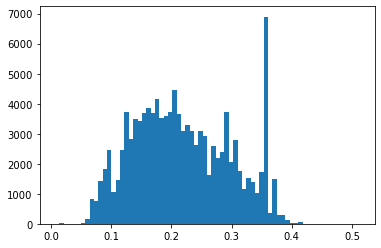

In [6]:
plt.hist(x=loan_df.BorrowerAPR, bins=70);

In [7]:
loan_df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

- 96% of recommendations are at 0, for those that are not 0, the mean is at 1.28.
- I also need some metric for subjective input, either friends investing or someone recommending a borrower.

109678

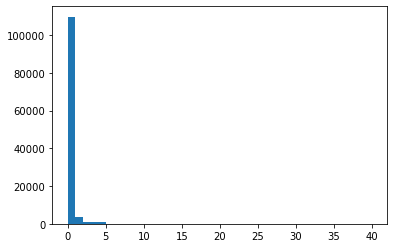

In [123]:
plt.hist(x=loan_df.Recommendations, bins=[0,1,2,5,10,15,25,40]);
loan_df.query("Recommendations == 0").shape[0]

In [53]:
(loan_df.Recommendations > 0).mean()

0.037380306660698456

In [31]:
loan_df.query("Recommendations != 0").Recommendations.describe()

count    4259.000000
mean        1.284809
std         1.168870
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: Recommendations, dtype: float64

In [171]:
loan_df.InvestmentFromFriendsCount.describe()

count    113937.000000
mean          0.023460
std           0.232412
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: InvestmentFromFriendsCount, dtype: float64

In [178]:
(loan_df.InvestmentFromFriendsCount > 0).mean()

0.01870331850057488

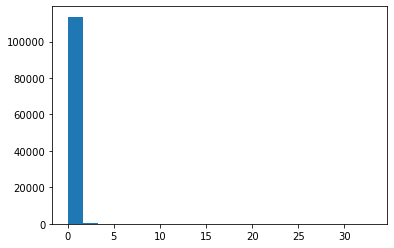

In [176]:
plt.hist(x=loan_df.InvestmentFromFriendsCount, bins=20);

In [168]:
loan_df.PercentFunded.describe()

count    113937.000000
mean          0.998584
std           0.017919
min           0.700000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.012500
Name: PercentFunded, dtype: float64

In [181]:
(loan_df.PercentFunded != 1.0).mean()

0.00763579873087759

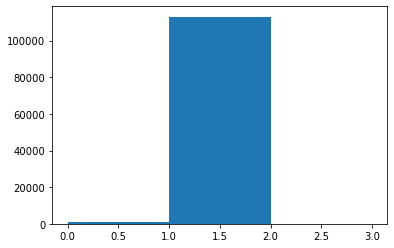

In [167]:
plt.hist(x=loan_df.PercentFunded, bins=[0,1,2,3]);

- log scale

0

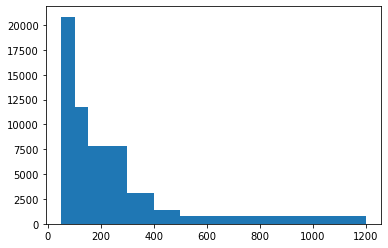

In [155]:
plt.hist(x=loan_df.Investors, bins=[50,100,150,200,300,400,500,1200]);
loan_df.query("Investors == 0").shape[0]

In [138]:
loan_df.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

- Prosper ratings and score appear to share NaN, and are empty.
- State, Occupation and Employment are not empty.
- Listing category, employment duration, homeownership, credit score are not empty
- CreditScore has 19 point difference between lower and upper range. Values are also discrete.

In [102]:
loan_df.sample(10).iloc[:,10:30]

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines
99792,0.2575,0.1425,0.1150,2.0,E,2.0,1,CT,Sales - Retail,Employed,94.0,True,False,NaN,2013-06-03 08:34:05,720.0,739.0,2002-05-26 00:00:00,6.0,6.0
92578,0.2896,0.1650,0.1246,1.0,HR,4.0,1,GA,Other,Employed,144.0,True,False,NaN,2012-03-18 17:51:35,720.0,739.0,1986-12-01 00:00:00,6.0,6.0
58699,0.2448,0.0990,0.1458,3.0,D,4.0,1,OR,Food Service,Full-time,80.0,False,False,NaN,2012-07-06 17:06:06,620.0,639.0,1993-12-15 00:00:00,12.0,13.0
25794,0.2896,0.1625,0.1271,1.0,HR,5.0,13,CA,Administrative Assistant,Employed,18.0,False,False,NaN,2012-07-25 09:08:51,700.0,719.0,1988-08-01 00:00:00,9.0,9.0
20569,0.1264,0.0524,0.0740,5.0,B,7.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0
105554,0.2274,0.1075,0.1199,3.0,D,4.0,1,GA,Other,Employed,51.0,True,False,NaN,2013-05-06 10:21:21,660.0,679.0,1996-07-08 00:00:00,7.0,7.0
54266,NaN,NaN,NaN,NaN,NaN,NaN,7,NJ,Engineer - Electrical,Full-time,19.0,False,False,NaN,2008-08-27 16:00:40.750000000,580.0,599.0,1981-09-30 00:00:00,7.0,7.0
69943,0.0507,0.0124,0.0383,7.0,AA,10.0,20,MN,Professor,Employed,31.0,False,False,NaN,2013-03-05 08:34:18,760.0,779.0,2000-08-26 00:00:00,11.0,11.0
22363,0.1487,0.0599,0.0888,5.0,B,6.0,13,AR,Military Enlisted,Employed,69.0,False,False,NaN,2012-10-22 14:22:22,660.0,679.0,2007-03-08 00:00:00,11.0,10.0
63623,0.2000,0.0975,0.1025,3.0,D,4.0,1,IL,Executive,Employed,118.0,False,False,NaN,2013-04-23 17:05:15,660.0,679.0,1995-07-25 00:00:00,15.0,14.0


In [17]:
notnan(['ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper'])

ProsperRating (numeric)      0.744736
ProsperRating (Alpha)        0.744736
ProsperScore                 0.744736
ListingCategory (numeric)    1.000000
BorrowerState                0.951596
Occupation                   0.968509
EmploymentStatus             0.980208
EmploymentStatusDuration     0.933077
IsBorrowerHomeowner          1.000000
CreditScoreRangeLower        0.994813
CreditScoreRangeUpper        0.994813
dtype: float64

In [193]:
(loan_df.CreditScoreRangeUpper - loan_df.CreditScoreRangeLower).value_counts()

19.0    113346
dtype: int64

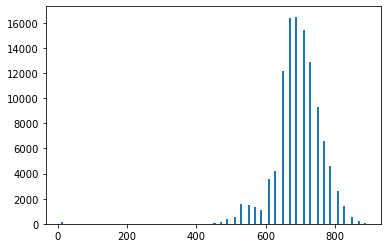

In [195]:
plt.hist(x = (loan_df.CreditScoreRangeLower + 9.5), bins=150);

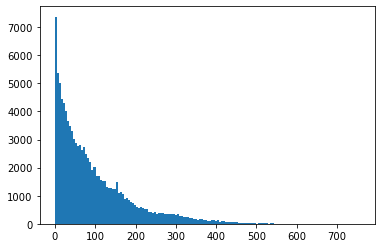

In [198]:
plt.hist(x = loan_df.EmploymentStatusDuration, bins=150);

- CurrentDelinquencies has many entries with 0, but 20% are above 0. It tells us about delinquency when the profile was pulled and is not updated
- TotalCreditLinespast7years has no 0 entries, 99.4% are values, gives us better indicator of customers past and long term financial behavior
- DebtToIncomeRatio, IncomeRange, IncomeVerifiable and StatedMonthlyIncome are not empty

In [103]:
loan_df.sample(10).iloc[:,30:50]

,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
7530,51.0,4,572.0,0.0,4.0,1.0,0.0,4.0,0.0,0.0,10608.0,0.79,2412.0,27.0,0.96,0.0,NaN,"$75,000-99,999",False,6666.666667
48193,41.0,2,0.0,1.0,3.0,36.0,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,Not displayed,True,5267.500000
45710,32.0,6,352.0,1.0,10.0,1.0,223.0,19.0,0.0,0.0,88089.0,0.97,2154.0,28.0,0.79,0.0,0.13,"$75,000-99,999",True,6250.000000
919,14.0,5,237.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,6769.0,0.29,15981.0,14.0,1.00,1.0,0.36,"$25,000-49,999",True,3583.333333
64357,22.0,12,686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21106.0,0.50,11408.0,22.0,1.00,2.0,0.29,"$50,000-74,999",True,5833.333333
26983,43.0,12,606.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,27966.0,0.98,264.0,41.0,1.00,2.0,0.27,"$25,000-49,999",True,4141.666667
52402,45.0,16,959.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,81763.0,0.56,24638.0,40.0,1.00,1.0,0.16,"$100,000+",True,10000.000000
33696,37.0,11,523.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,18469.0,0.58,13017.0,32.0,1.00,1.0,0.26,"$75,000-99,999",True,6666.666667
80006,13.0,5,312.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12548.0,0.69,5448.0,12.0,1.00,2.0,0.11,"$75,000-99,999",True,6786.083333
107806,58.0,6,309.0,2.0,7.0,0.0,0.0,2.0,1.0,0.0,8724.0,0.97,146.0,28.0,0.57,1.0,0.18,"$25,000-49,999",True,3750.000000


In [24]:
notnan(['DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'CurrentDelinquencies', 'TotalCreditLinespast7years' ])

DebtToIncomeRatio             0.924923
IncomeRange                   1.000000
IncomeVerifiable              1.000000
StatedMonthlyIncome           1.000000
CurrentDelinquencies          0.993883
TotalCreditLinespast7years    0.993883
dtype: float64

- Type int, lowercase column name

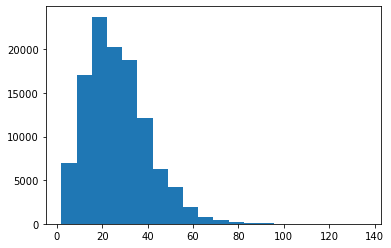

In [21]:
plt.hist(x=loan_df.TotalCreditLinespast7years, bins=20);

In [22]:
loan_df.TotalCreditLinespast7years.describe()

count    113240.000000
mean         26.754539
std          13.637871
min           2.000000
25%          17.000000
50%          25.000000
75%          35.000000
max         136.000000
Name: TotalCreditLinespast7years, dtype: float64

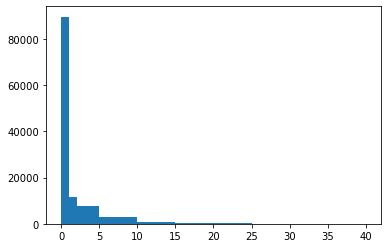

In [59]:
plt.hist(x=loan_df.CurrentDelinquencies, bins=[0,1,2,5,10,15,25,40]);

In [60]:
loan_df.CurrentDelinquencies.describe()

count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

In [52]:
(loan_df.CurrentDelinquencies > 0).mean()

0.20623677997489842

In [61]:
notnan(['LoanCurrentDaysDelinquent'])

LoanCurrentDaysDelinquent    1.0
dtype: float64

In [6]:
delinquent = loan_df.query("CurrentDelinquencies > 0").groupby('MemberKey')[['CurrentDelinquencies']].agg({'CurrentDelinquencies':['mean', 'max', 'count']}).reset_index()

- For members with multiple loans and delinquencies.

In [11]:
delinquent.shape

(20422, 4)

In [9]:
delinquent[delinquent[('CurrentDelinquencies', 'count')] > 1].sample(10)

MemberKey CurrentDelinquencies            
                                               mean   max count
11009  8A5433661481439798D57CB                 9.00  16.0     2
15007  BB993390998762054537118                 2.50   4.0     4
10934  89573384614615474CB6109                 5.50   7.0     2
9645   78B43371734944502C5AA00                 1.00   1.0     2
20255  FDD53524595543153C5CD93                 3.00   4.0     2
7490   5D79355730386826357D3E7                 4.00   6.0     2
7510   5DAA3412856486623AF7AD5                 7.00  10.0     2
18068  E25C340114010923430DF34                 1.00   1.0     2
19099  EF05346680710391991D29E                 1.75   2.0     4
11343  8E803562130809365FD49E9                 1.00   1.0     2

- Costumer has downgraded ratings due to delinquency

In [32]:
loan_df.query("MemberKey == 'B8E733661966893821E4AEF'")[loan_cols_to_keep]

,MemberKey,LoanKey,Term,LoanStatus,LoanOriginationDate,ClosedDate,ListingCategory (numeric),LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,Investors,TotalCreditLinespast7years,CurrentDelinquencies,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
12542,B8E733661966893821E4AEF,EB273365637656246BB088B,36,Completed,2006-05-10 00:00:00,2006-08-03 00:00:00,0,1200,46.92,0.25328,12,10.0,6.0,500.0,0.01482,3166.666667,True,NaN,NaN,True
92147,B8E733661966893821E4AEF,8440337961223181133557E,36,Completed,2007-02-06 00:00:00,2009-04-14 00:00:00,0,1000,18.43,0.21857,31,11.0,6.0,460.0,0.01000,3166.666667,True,NaN,NaN,True


- LoanKey, MemberKey, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate are not empty
- MonthlyLoanPayment is not empty either

In [104]:
loan_df.sample(10).iloc[:,50:70]

,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments
111618,71D43653755341384819FE4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,21,67859,6000,2012-06-13 00:00:00,Q2 2012,956A3547400675448FFF699,144.35,2887.00,1509.81
47543,09643672409834831B2ACFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,14,82619,2000,2013-01-17 00:00:00,Q1 2013,09CB3567880554887F362E1,178.13,2105.25,2000.00
263,E6E33669095477661F3DEBA,1.0,3.0,3.0,0.0,0.0,10000.0,0.00,45.0,0,NaN,15,79197,7000,2012-12-20 00:00:00,Q4 2012,45D13554554454303FAD181,226.99,3177.86,2467.31
83204,A92534216541523131CE592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409,10.0,69,32249,25000,2008-06-04 00:00:00,Q2 2008,D7333421004209581AED7E5,983.84,3920.36,1860.71
60543,0819358671019140373CA9D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,47,42014,4500,2010-04-29 00:00:00,Q2 2010,2DF33391123027804B70C0B,193.51,6761.97,4500.00
107782,1F6734192164751167B4086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,70,30560,5500,2008-05-05 00:00:00,Q2 2008,272F34185026312349392E2,188.51,6763.76,5499.95
52754,A0F4370857904187158CA9D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135159,8000,2014-03-10 00:00:00,Q1 2014,96633706436733048751711,301.40,0.00,0.00
33061,E89E37037764115252DB4F9,2.0,40.0,40.0,0.0,0.0,14500.0,5767.99,NaN,0,NaN,2,127702,4000,2014-01-21 00:00:00,Q1 2014,F1C034161617878262E92C4,139.35,139.35,87.20
72626,CCBF36862819422227C22D3,1.0,35.0,35.0,0.0,0.0,4200.0,0.00,-69.0,0,NaN,8,94900,6000,2013-07-02 00:00:00,Q3 2013,DB3C34780367760622D260F,141.92,1135.36,570.06
67513,D89E3381685540873600FF3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,85,7407,3000,2007-02-13 00:00:00,Q1 2007,96403380419195598B71F4F,93.66,3324.25,3000.00


In [22]:
notnan(['LoanKey', 'MemberKey', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment'])

LoanKey                       1.0
MemberKey                     1.0
LoanMonthsSinceOrigination    1.0
LoanNumber                    1.0
LoanOriginalAmount            1.0
LoanOriginationDate           1.0
MonthlyLoanPayment            1.0
dtype: float64

In [21]:
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

- CreditGrade is missing a lot of data as it's only for pre-2009 data.

In [73]:
loan_df.CreditGrade.describe()

count     28953
unique        8
top           C
freq       5649
Name: CreditGrade, dtype: object

- We have a lot of data, we can use this as our rating for the loans.

In [214]:
loan_df.CreditScoreRangeLower.value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [62]:
loan_df['ProsperRating (numeric)'].describe()

count    84853.000000
mean         4.072243
std          1.673227
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRating (numeric), dtype: float64

- Categorical type, change column name to lower case

In [16]:
loan_df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [45]:
loan_df['ProsperRating (numeric)'].dtype

dtype('float64')

- same data as above

In [44]:
loan_df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [6]:
loan_df.MemberKey.nunique()

90831

In [5]:
loan_df.LoanKey.nunique()

113066

In [5]:
loan_df.shape

(113937, 81)

- Past Due should be it's own column as it describes loans that are not completed, defaulted or chargedoff.
- It's for payments that are delayed and lenders can penalize borrowers with late fees etc.

In [44]:
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

- int type

In [41]:
loan_df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

- People borrow in some ranges like 4k, 10k, 15k, 20k, 25k etc.

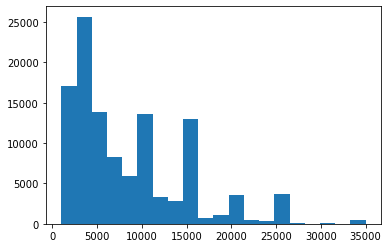

In [156]:
plt.hist(x=loan_df.LoanOriginalAmount, bins=20);

In [159]:
loan_df.LoanOriginalAmount.value_counts()[:10]

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
3000      5749
25000     3630
20000     3291
1000      3206
2500      2992
Name: LoanOriginalAmount, dtype: int64

In [41]:
loan_df.LoanOriginationDate.min(), loan_df.LoanOriginationDate.max()

('2005-11-15 00:00:00', '2014-03-12 00:00:00')

- We get data from when the listing is created, we can't rely on one final data being in the dataset even for members.
- We will still look at members behavior across different loans, but otherwise we will look at each loan on it's own, with it's own accompanying data.

In [58]:
loan_df.query("MemberKey == 'FFFD3366303346990B4CCDD'")[cols]

,MemberKey,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
73594,FFFD3366303346990B4CCDD,"$50,000-74,999",4441.666667,True,GA,73.0,False
75209,FFFD3366303346990B4CCDD,"$25,000-49,999",3466.666667,True,GA,44.0,False
87796,FFFD3366303346990B4CCDD,Not displayed,7916.666667,True,NaN,NaN,False


- We're not going to separate the data into multiple tables, as the member data changes.

In [31]:
loan_cols_to_keep = [
##Keys:
'MemberKey',
'LoanKey',
##Loan:
'Term',
'LoanStatus', #Past Due should be own column
'LoanOriginationDate',
#'LoanMonthsSinceOrigination',
'ClosedDate',
'ListingCategory (numeric)',
'LoanOriginalAmount',
'MonthlyLoanPayment',
'BorrowerAPR',
#'PercentFunded',
#'Recommendations',
'Investors',
##Borrower:
#'BorrowerRate',
'TotalCreditLinespast7years',
'CurrentDelinquencies',
#'DelinquenciesLast7Years',
#'ProsperRating (numeric)',
'CreditScoreRangeLower', #add 9.5 to get mean of lower and upper
#'CreditScoreRangeUpper',
'DebtToIncomeRatio',
#'IncomeRange',
'StatedMonthlyIncome',
'IncomeVerifiable',
'BorrowerState',
'EmploymentStatusDuration',
'IsBorrowerHomeowner',
]

<a id='cleaning'></a>
### Cleaning

- Copy dataframe with fewer columns into new_loan_df
- Fix column names to be lowercase separeted by underscore
- Fix datatypes to match each column
- Fix multiple variables in one column (with loan status)


In [34]:
loan_data = loan_df[loan_cols_to_keep].copy()
loan_data.sample(2)

,MemberKey,LoanKey,Term,LoanStatus,LoanOriginationDate,ClosedDate,ListingCategory (numeric),LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,Investors,TotalCreditLinespast7years,CurrentDelinquencies,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
91,0A013502216942205867375,EC883605836561789BAE123,36,Completed,2010-12-20 00:00:00,2011-12-09 00:00:00,1,3500,152.83,0.35858,54,11.0,0.0,700.0,0.30,2250.000000,True,MN,25.0,False
84354,DB843510274283632946A11,8BE1367015916114409A8DA,60,Current,2013-01-02 00:00:00,NaN,20,8000,250.39,0.30933,72,44.0,0.0,640.0,0.16,2916.666667,True,NY,213.0,False


### ISSUE #1:
- Fix column name

In [33]:
new_col_names = {
'MemberKey': 'member_key',
'LoanKey': 'loan_key',
'Term': 'term',
'LoanStatus': 'status',
'LoanOriginationDate': 'start_date',
'ClosedDate': 'closed_date',
'ListingCategory (numeric)': 'category',
'LoanOriginalAmount': 'loan_amount',
'MonthlyLoanPayment': 'payment_amount',
'Investors': 'investors',
'BorrowerAPR': 'apr',
'CurrentDelinquencies': 'delinquencies',
'CreditScoreRangeLower': 'rating',
'TotalCreditLinespast7years': 'credit_lines',
'DebtToIncomeRatio': 'dti',
'StatedMonthlyIncome': 'stated_income',
'IncomeVerifiable': 'income_verifiable',
'BorrowerState': 'state',
'EmploymentStatusDuration': 'employment_duration',
'IsBorrowerHomeowner': 'is_homeowner'
}

In [35]:
loan_data = loan_data.rename(columns=new_col_names)

In [36]:
loan_data.head(1)

,member_key,loan_key,term,status,start_date,closed_date,category,loan_amount,payment_amount,apr,investors,credit_lines,delinquencies,rating,dti,stated_income,income_verifiable,state,employment_duration,is_homeowner
0,1F3E3376408759268057EDA,E33A3400205839220442E84,36,Completed,2007-09-12 00:00:00,2009-08-14 00:00:00,0,9425,330.43,0.16516,258,12.0,2.0,640.0,0.17,3083.333333,True,CO,2.0,True


### ISSUE #2:
- Fix credit rating to get the mean of lower and upper by adding 9.5

In [37]:
loan_data.rating = loan_data.rating + 9.5

In [103]:
loan_data.sample(5).rating 

46470     669.5
27455     789.5
4188      669.5
55507     749.5
100536    589.5
Name: rating, dtype: float64

### ISSUE #3:
- Fix status so that we get a column for Past Due
- Set past due values to number range
- Fix status so past due is replaced with Current

In [38]:
import re
def fix_status(col):
    if col in [
   'Past Due (1-15 days)', 'Past Due (31-60 days)',
   'Past Due (61-90 days)', 'Past Due (91-120 days)',
   'Past Due (16-30 days)', 'Past Due (>120 days)']:
        return 'Current', re.findall('Past Due \((\S+)', col)[0]
    return col, 0

In [39]:
loan_data[['status', 'past_due']] = loan_data.apply(lambda row: fix_status(row.status), axis=1, result_type='expand')

In [57]:
loan_data.status.value_counts().index

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'FinalPaymentInProgress', 'Cancelled'],
      dtype='object')

### ISSUE #4:

- set past_due and rating value types to ordered category
- set category and status to un-ordered category

In [109]:
loan_data.past_due.value_counts().index

Index([0, '1-15', '31-60', '61-90', '91-120', '16-30', '>120'], dtype='object')

In [60]:
loan_data.category.value_counts().index

Int64Index([1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 20, 19, 5, 16, 11, 8, 10, 9,
            12, 17],
           dtype='int64')

In [111]:
loan_data.rating.value_counts().index.sort_values()

Float64Index([  9.5, 369.5, 429.5, 449.5, 469.5, 489.5, 509.5, 529.5, 549.5,
              569.5, 589.5, 609.5, 629.5, 649.5, 669.5, 689.5, 709.5, 729.5,
              749.5, 769.5, 789.5, 809.5, 829.5, 849.5, 869.5, 889.5],
             dtype='float64')

In [61]:
loan_data.status.value_counts().index

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'FinalPaymentInProgress', 'Cancelled'],
      dtype='object')

In [23]:
def set_categorical(df):
    ordinal_dict = {'past_due': ['1-15', '16-30', '31-60', '61-90', '91-120', '>120'],
                    'rating_alpha':['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
                   }
    nominal_dict = {'category': [1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 20, 19, 5, 16, 11, 8, 10, 9,
                12, 17],
                    'status': ['Current', 'Completed', 'Chargedoff', 'Defaulted']
                   }
    
    t_past_due = pd.CategoricalDtype(categories=ordinal_dict['past_due'], ordered=True)
    t_rating_alpha = pd.CategoricalDtype(categories=ordinal_dict['rating_alpha'], ordered=True)
    t_category = pd.CategoricalDtype(categories=nominal_dict['category'], ordered=False)
    t_status = pd.CategoricalDtype(categories=nominal_dict['status'], ordered=False)
    
    df.past_due = df.past_due.astype(t_past_due)
    df.rating_alpha = df.rating_alpha.astype(t_rating_alpha)
    df.category = df.category.astype(t_category)
    df.status = df.status.astype(t_status)
    return df

In [43]:
loan_data[['past_due', 'rating', 'category', 'status']].dtypes

past_due    category
rating      category
category    category
status      category
dtype: object

In [44]:
loan_data.dtypes

member_key               object
loan_key                 object
term                      int64
status                 category
start_date               object
closed_date              object
category               category
loan_amount               int64
payment_amount          float64
apr                     float64
investors                 int64
credit_lines            float64
delinquencies           float64
rating                 category
dti                     float64
stated_income           float64
income_verifiable          bool
state                    object
employment_duration     float64
is_homeowner               bool
past_due               category
dtype: object

### ISSUE #5:
- delinquencies, credit_lines, employment_duration to int
- dates to pandas datetime

In [47]:
loan_data[['delinquencies','credit_lines']] = loan_data[['delinquencies','credit_lines']].convert_dtypes()

In [75]:
loan_data.employment_duration = loan_data.employment_duration.convert_dtypes()

In [76]:
loan_data[['delinquencies','credit_lines', 'employment_duration']].dtypes

delinquencies          Int64
credit_lines           Int64
employment_duration    Int64
dtype: object

In [52]:
loan_data.start_date = pd.to_datetime(loan_data.start_date)
loan_data.closed_date = pd.to_datetime(loan_data.closed_date)

In [53]:
loan_data[['closed_date', 'start_date']].dtypes

closed_date    datetime64[ns]
start_date     datetime64[ns]
dtype: object

In [54]:
loan_data.dtypes

member_key                     object
loan_key                       object
term                            int64
status                       category
start_date             datetime64[ns]
closed_date            datetime64[ns]
category                     category
loan_amount                     int64
payment_amount                float64
apr                           float64
investors                       int64
credit_lines                    Int64
delinquencies                   Int64
rating                       category
dti                           float64
stated_income                 float64
income_verifiable                bool
state                          object
employment_duration           float64
is_homeowner                     bool
past_due                     category
dtype: object

### Save

In [8]:
#loan_data.to_csv('data/loan_data_master.csv', index = False)

- remove data that is outlier or makes little sense

In [263]:
#We will remove the max value with 1.75 million monthly income
loan_df = loan_df.query("stated_income < 1e6").copy()

In [264]:
#remove 0 income, 0 payment_amount, and income lower than payment for income below 1000
loan_df = loan_df.query("not (payment_amount < 1 or (stated_income < 1) or (stated_income < 1000 and payment_amount > stated_income))").copy()

In [233]:
def fix_status(x):
    if('Final' in x):
        return 'Final_payment'
    return x

In [266]:
loan_df['status'] = loan_df.apply(lambda x:fix_status(x.status), axis=1, result_type='expand')

In [680]:
#remove duplicated
loan_df.drop_duplicates(subset=['loan_key'], inplace=True)

- correct the payment amount

In [596]:
def pmt(amount, rate, term):
    return (amount*rate/12)/((1-(1+rate/12)**(-(term/12)*12)))

In [687]:
def correct_payment(row):
    try:
        payment = pmt(row.loan_amount, row.apr, row.term)
        diff = (row.payment_amount - pmt(row.loan_amount, row.apr, row.term))/row.payment_amount
        if diff < -.2:
            return row.loan_key, payment
        return row.loan_key, row.payment_amount
    except:
        return row.loan_key, row.payment_amount

In [699]:
payment_df = pd.DataFrame({})
payment_df[['loan_key', 'payment_amount']] = loan_df[['loan_key', 'term', 'apr', 'loan_amount','payment_amount']].apply(lambda row: correct_payment(row), axis = 1, result_type='expand')

In [705]:
loan_df.payment_amount.mean()

274.78451971974937

In [704]:
payment_df.payment_amount.mean()

275.6321712799573

In [706]:
loan_df.payment_amount = payment_df.payment_amount

In [265]:
loan_df.income_verifiable.mean()

0.9369019353910353

### Add rating alpha
- Fill where possible with mean values, as the credit rating is ordinal and discrete.
- I can fill pre-2009 by translating the rating number to alphabet.

In [4]:
#take ProsperRating (Alpha) and loan_key from the original data and merge into the new data
rating_df = loan_df[['LoanKey', 'ProsperRating (Alpha)']]

In [10]:
rating_df.rename(columns={'LoanKey': 'loan_key', 'ProsperRating (Alpha)': 'rating_alpha'}, inplace=True)

In [86]:
loan_df = pd.merge(loan_df, rating_df, on='loan_key')

In [87]:
loan_df.rating_alpha.notnull().mean()

0.7513939851787899

In [24]:
(loan_df.start_date < '2009').mean()

0.24732894452838333

In [30]:
loan_df.start_date.max()

'2014-03-12 00:00:00.000'

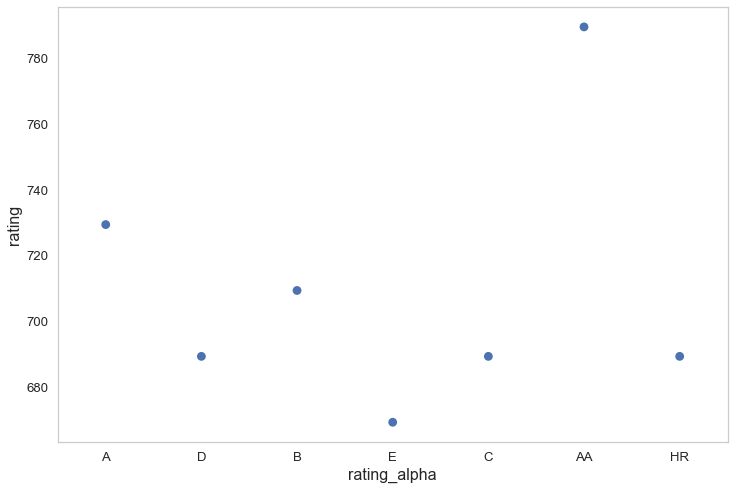

In [39]:
sns.pointplot(x='rating_alpha', y='rating', data=loan_df, estimator=np.median, join=False);

In [52]:
def np_75th(x):
    return np.quantile(x,.75)

def np_25th(x):
    return np.quantile(x,.25)
def np_60th(x):
    return np.quantile(x,.60)

def np_40th(x):
    return np.quantile(x,.40)


In [70]:
loan_df.query("rating_alpha == 'HR' or rating_alpha == 'D'").groupby('rating_alpha').agg({'dti': ['mean', 'median', 'count'], 'delinquencies': ['mean'], 'term': ['mean', 'median'], 'apr': ['mean', 'median'], 'loan_amount':['mean', 'median']})

dti               delinquencies       term         \
                  mean median  count          mean       mean median   
rating_alpha                                                           
D             0.263511   0.24  12739      0.421931  42.613432   36.0   
HR            0.331798   0.27   5668      0.588803  36.000000   36.0   

                   apr           loan_amount          
                  mean   median         mean  median  
rating_alpha                                          
D             0.280382  0.28386  7115.841509  6500.0  
HR            0.356008  0.35797  3474.215180  4000.0

In [74]:
loan_df.groupby(['rating_alpha']).agg({'rating': ['mean','median', np_25th,np_40th,np_60th,np_75th], 'dti':['mean','median']}).sort_values(by=[('rating', 'mean')], ascending=False)

rating                                              dti  \
                    mean median np_25th np_40th np_60th np_75th      mean   
rating_alpha                                                                
AA            783.379327  789.5   749.5   769.5   789.5   809.5  0.173786   
A             739.236221  729.5   709.5   729.5   749.5   769.5  0.215735   
B             716.283747  709.5   689.5   709.5   729.5   749.5  0.233363   
C             699.277851  689.5   669.5   689.5   709.5   729.5  0.269073   
D             689.470056  689.5   669.5   669.5   689.5   709.5  0.263511   
HR            685.884488  689.5   669.5   669.5   689.5   709.5  0.331798   
E             671.809618  669.5   649.5   669.5   669.5   689.5  0.277241   

                     
             median  
rating_alpha         
AA             0.16  
A              0.20  
B              0.22  
C              0.25  
D              0.24  
HR             0.27  
E              0.24

### Dealing with missing ratings
- We can look at and compare the alphabetical ratings with the credit rating and dti and get those that fall within the specified rating letter an alphabetic rating.

In [84]:
def change_rating(r, no_dti = False):
    dti = r.dti
    if (no_dti):
        dti = .3
    if (r.rating <= 689.5 and dti > 0.3):
        return 'HR'
    elif (r.rating > 783 and dti <= 0.18):
        return 'AA'
    elif (r.rating > 739 and dti <= 0.21):
        return 'A'
    elif (r.rating > 716 and dti <= 0.23):
        return 'B'
    elif (r.rating > 699 and dti <= .25):
        return 'C'
    elif (r.rating > 689 and dti <= .27):
        return 'D'
    elif (r.rating >= 671 and dti <= .3):
        return 'E'
    return r.rating_alpha

In [88]:
loan_df.rating_alpha = loan_df[['rating', 'dti', 'rating_alpha']].apply(lambda row: row.rating_alpha if row.notnull().all() else change_rating(row), axis=1, result_type='expand')

In [89]:
loan_df.rating_alpha.notnull().mean()

0.8616177422836175

In [90]:
loan_df.rating_alpha = loan_df[['rating', 'dti', 'rating_alpha']].apply(lambda row: row.rating_alpha if row.notnull().all() else change_rating(row, True), axis=1, result_type='expand')

In [91]:
loan_df.rating_alpha.notnull().mean()

0.8809536657313476

In [92]:
loan_df.groupby(['rating_alpha']).agg({'rating': ['mean','median', np_25th,np_40th,np_60th,np_75th], 'dti':['mean','median']}).sort_values(by=[('rating', 'mean')], ascending=False)

rating                                              dti  \
                    mean median np_25th np_40th np_60th np_75th      mean   
rating_alpha                                                                
AA            789.398958  789.5   769.5   789.5   809.5   809.5  0.156905   
A             741.545574  749.5   709.5   729.5   749.5   769.5  0.206850   
B             716.890394  709.5   689.5   709.5   729.5   729.5  0.227386   
C             699.203143  689.5   669.5   689.5   709.5   709.5  0.262266   
E             699.126174  689.5   669.5   689.5   709.5   729.5  0.311468   
D             688.531216  689.5   669.5   669.5   689.5   709.5  0.254321   
HR            657.818617  669.5   629.5   649.5   669.5   689.5  0.421827   

                     
             median  
rating_alpha         
AA             0.14  
A              0.19  
B              0.21  
C              0.24  
E              0.29  
D              0.23  
HR             0.35

In [96]:
loan_df.query("rating_alpha == 'HR' or rating_alpha == 'D'").groupby('rating_alpha').agg({'dti': ['mean', 'median', 'count'], 'delinquencies': ['mean'], 'term': ['mean', 'median'], 'apr': ['mean', 'median'], 'loan_amount':['mean', 'median']})

dti               delinquencies       term         \
                  mean median  count          mean       mean median   
rating_alpha                                                           
D             0.254321   0.23  14440      0.443488  41.972551   36.0   
HR            0.421827   0.35  10366      0.771088  36.000000   36.0   

                   apr           loan_amount          
                  mean   median         mean  median  
rating_alpha                                          
D             0.265486  0.27776  7254.917115  6500.0  
HR            0.299024  0.35285  4655.068382  4000.0

In [100]:
loan_df = loan_df.drop(['rating'], axis=1)

### Add loan success column
- Rather than having to group data on every analysis or figure, we want to have a column that states when loans are successful or when they fail.
- We also don't want in our status data that is in multiple states. A loan in final payment is still an ongoing loan.
- We want to remove the 4 loans that were cancelled as they are not only insignificant, they give us no useful information.

In [187]:
loan_df.status.value_counts()

Current          58282
Completed        36406
Chargedoff       11537
Defaulted         4762
Final_payment      201
Cancelled            4
Name: status, dtype: int64

- Remove cancelled
- Change final_payment to Current
- Have True values for completed loans and False for failed loans (excluding Cancelled)

In [190]:
loan_df = loan_df.query("status != 'Cancelled'")

In [209]:
def fix_status(row):
    if (row.status == 'Final_payment'):
        return 'Current'
    return row.status

def loan_success(row):
    if(row.status in ['Chargedoff','Defaulted']):
        return False
    elif (row.status == 'Completed'):
        return True
    return np.nan

In [199]:
loan_df.status = loan_df[['status','loan_key']].apply(lambda row: fix_status(row) if row.notnull().all() else row.status, axis=1, result_type='expand')

In [210]:
loan_df['success'] = loan_df[['status','loan_key']].apply(lambda row: loan_success(row) if row.notnull().all() else np.nan, axis=1, result_type='expand')

## Load

In [213]:
#loan_df.to_csv('data/loan_data_master.csv', index = False)

In [2]:
loan_df = pd.read_csv('data/loan_data_master.csv')

In [4]:
def convert_type(df):
    df = set_categorical(df)
    df.start_date = pd.to_datetime(df.start_date)
    df.closed_date = pd.to_datetime(df.closed_date)
    df[['delinquencies','credit_lines', 'employment_duration']] = df[['delinquencies','credit_lines', 'employment_duration']].convert_dtypes()
    return df

In [24]:
loan_df = convert_type(loan_df)

In [6]:
loan_df.dtypes

member_key                     object
loan_key                       object
term                            int64
status                       category
start_date             datetime64[ns]
closed_date            datetime64[ns]
category                     category
loan_amount                     int64
payment_amount                float64
apr                           float64
investors                       int64
credit_lines                    Int64
delinquencies                   Int64
dti                           float64
stated_income                 float64
income_verifiable                bool
state                          object
employment_duration             Int64
is_homeowner                     bool
past_due                     category
rating_alpha                 category
success                        object
dtype: object

### What is the structure of your dataset?

There are over 113 937 loans, with 81 fields describing each.

We've cut down our dataset to 111k and 22 columns we will use in our analysis based on availabillity of data, repetitive variables, derived variables, out of scope for this project.

### What is/are the main feature(s) of interest in your dataset?

I want to find out how different variables affects the outcomes of loans. What makes a loan successful or fail. What are the variables associated with risk for the lender.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the variables with biggest effect are going to be term and monthly payment vs monthly income. Homeowner status and employment will also play a big role, people who have stable employment will also likely be better placed to pay regularly than people who are out of job and have to rely on savings to pay.

There is a lot I don't know that I want to find out by exploring this dataset.

<a id='exploration'></a>

## Univariate Exploration

- We will look at variables individually and then at the relationship between 2 or more variables.
- Some of the variables in the dataset I have kept for the bi- or multivariate section, like state, homeownership status, loan category.

- We will start by looking at outcomes of loans by looking at the loan status.

In [ ]:
sns.reset_defaults()

In [28]:
default_color = sns.color_palette()[0]
sns.set(style="whitegrid", rc={"figure.figsize":(12, 8), 'axes.grid': False, 'axes.titlesize':20, 'axes.labelsize':16,}, font_scale=1.2)

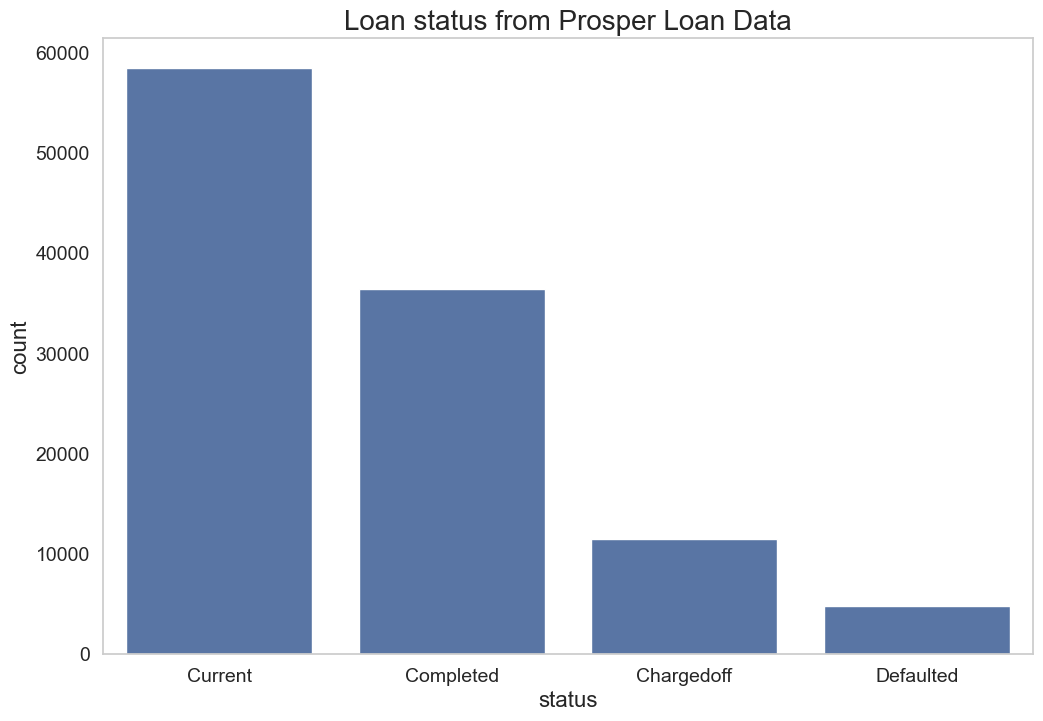

In [29]:
sns.countplot(data = loan_df, x='status', color=default_color);
plt.title('Loan status from Prosper Loan Data')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [544]:
loan_df.status.value_counts()

Current       58483
Completed     36406
Chargedoff    11537
Defaulted      4762
Name: status, dtype: int64

#### Loan status
- We have about 10 000 loans charged off and 5000 defaulted, majority of the loans are in the current `status` followed by completed at about 36 000. We have 5 cancelled and 205 in the final payment.

- Next we want to look at loans with payments that are past due and how they distributed.

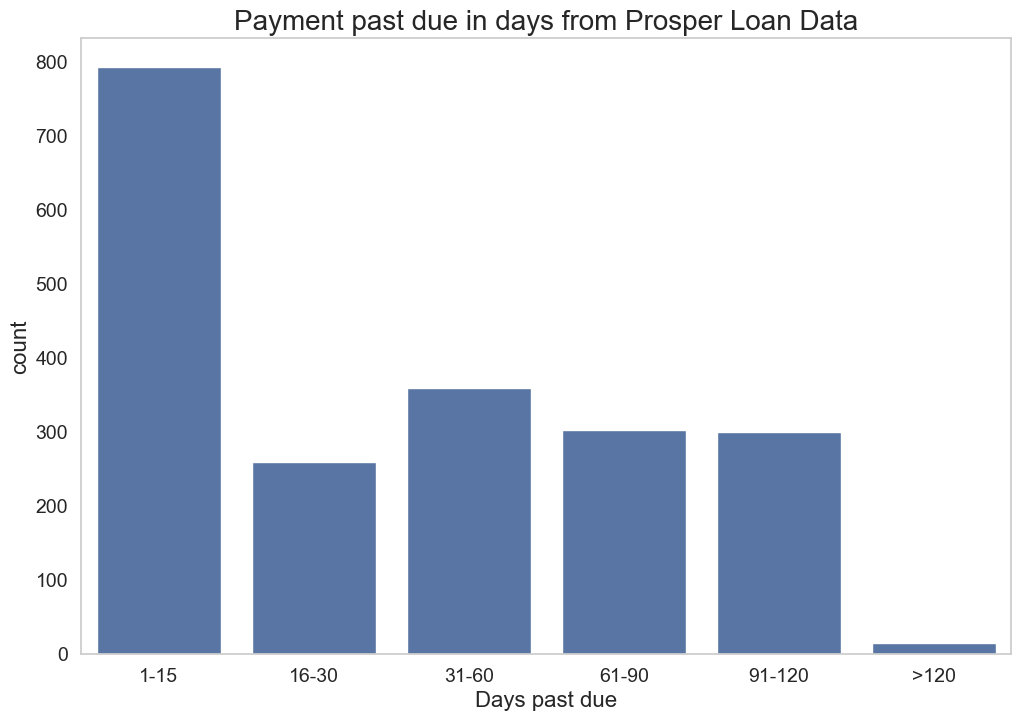

In [271]:
sns.countplot(data = loan_df, x='past_due', color=default_color);
plt.title('Payment past due in days from Prosper Loan Data')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Days past due');

In [272]:
loan_df.past_due.value_counts()

1-15      792
31-60     359
61-90     302
91-120    300
16-30     259
>120       15
Name: past_due, dtype: int64

#### Past due
- For the past due data, we get a big chunk of the values in 1-15 days, these can be everything from failed payment, insufficient funds in the account or failure to make the payment manually. I suspect most people have at point or another had a payment past due, and not out of lack of funds or will, but due to the circumstances mentioned above. 

- From there we look at pastments that are at least 2 weeks past due, and here we get a more even spread noting that the periods are not linear.

- We have a total of around 2000 loans that are in this category.

- If as we suspect the long past due counts lead to defaults or chargeoffs, we can look at what some of the underlying variables that are closest associated with this.

- We will now look at the distribution stated income as I assume this will have a major impact on loans, both amount and success rate.

In [273]:
np.log10(loan_df.stated_income.max())

5.791373289978588

In [292]:
log_binsize = 0.1
bins = 10 ** np.arange(2.5, 5, log_binsize)

In [293]:
bins = np.append(bins, 10**np.arange(5, 5.79 + .5, .5))

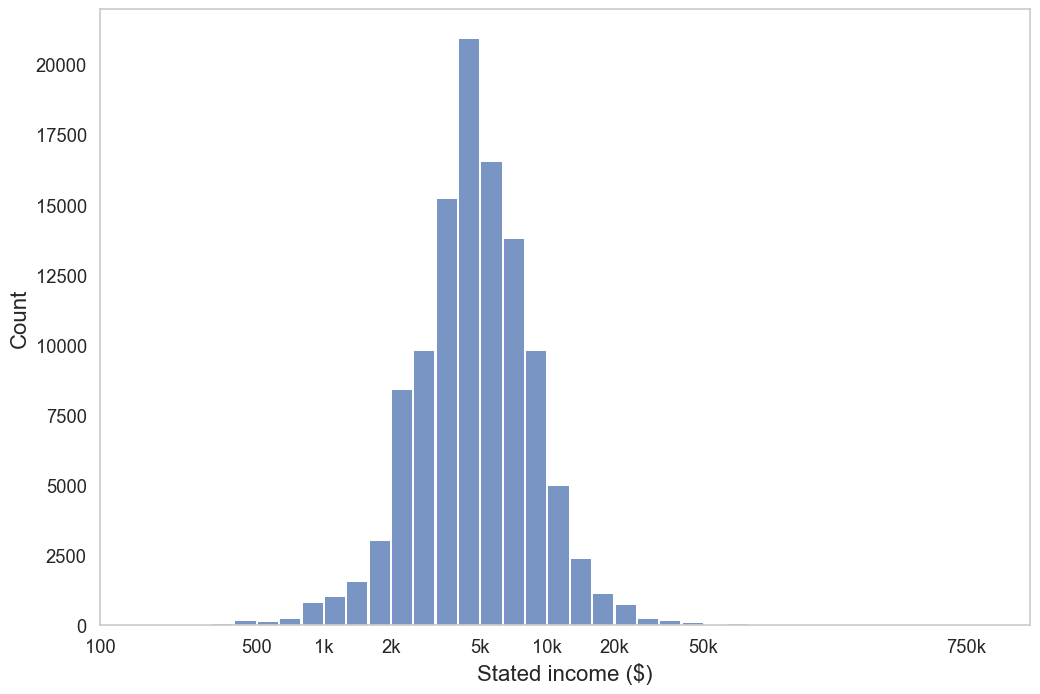

In [330]:
sns.histplot(data = loan_df, x = 'stated_income', color = default_color, bins=bins, shrink=.9)
plt.xscale('log')
plt.xticks([100,500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4,7.5e5], [100, 500, '1k', '2k', '5k', '10k', '20k', '50k', '750k'])
plt.xlabel('Stated income ($)');

#### Income
- Log scaled approximating a normal distribution around $5000. 
- Mostly between 2-10 000
- 500 and  50k on the extreme ends

- Now for the metrics of the loan that we associate most with the loans: loan amount, payment amount and rate.

In [337]:
loan_df.apr.value_counts()

0.35797    3539
0.35643    1589
0.37453    1166
0.30532     875
0.29510     720
           ... 
0.37047       1
0.20474       1
0.22030       1
0.08646       1
0.19543       1
Name: apr, Length: 6499, dtype: int64

In [351]:
loan_df.payment_amount.value_counts()

173.71    2341
172.76     477
86.85      451
174.20     450
130.28     355
          ... 
326.17       1
401.79       1
141.07       1
117.51       1
132.11       1
Name: payment_amount, Length: 23273, dtype: int64

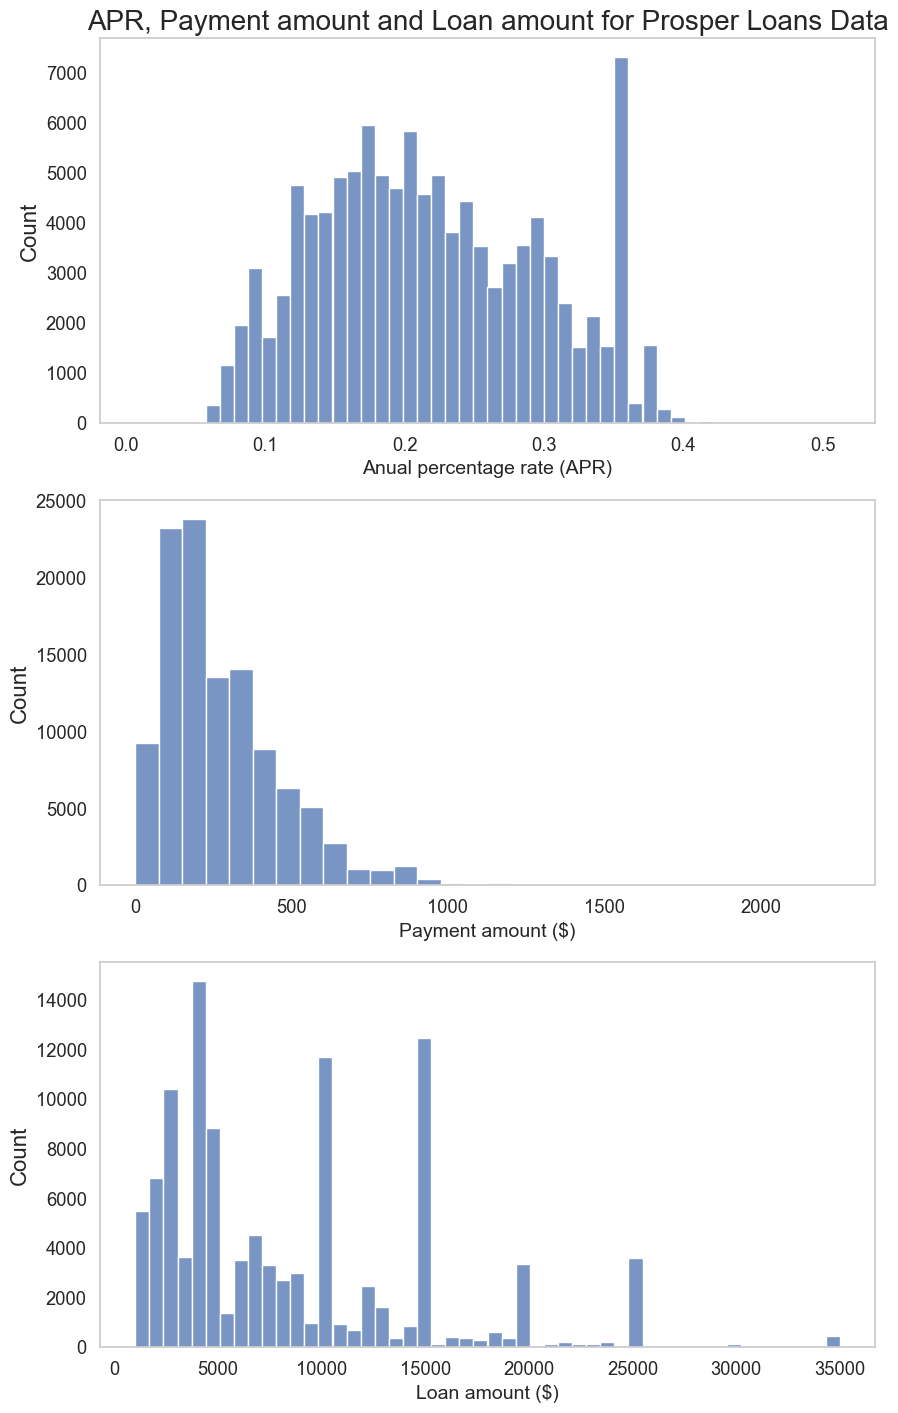

In [363]:
fig, ax = plt.subplots(nrows=3, figsize = [10,17])

sns.histplot(data = loan_df, x = 'apr', color = default_color, ax = ax[0], bins=50);
sns.histplot(data = loan_df, x = 'payment_amount', color = default_color, ax = ax[1], bins=30);
sns.histplot(data = loan_df, x = 'loan_amount', color = default_color, ax = ax[2], bins = 50);
ax[0].set_title('APR, Payment amount and Loan amount for Prosper Loans Data')
ax[0].set_xlabel('Anual percentage rate (APR)', fontsize=14);
ax[1].set_xlabel('Payment amount ($)', fontsize=14);
ax[2].set_xlabel('Loan amount ($)', fontsize=14);

In [30]:
loan_df.query("payment_amount > 2000")

,member_key,loan_key,term,status,start_date,closed_date,category,loan_amount,payment_amount,apr,...,delinquencies,dti,stated_income,income_verifiable,state,employment_duration,is_homeowner,past_due,rating_alpha,success
8458,2B603555379235401C5DB18,AEB536610571490589752E8,12,Completed,2012-08-31,2013-08-31,1,25000,2218.53,0.17493,...,0,0.39,10333.333333,True,CA,293,True,NaN,B,True
17259,26D835686921010494DCA79,C566367298632778359D33D,12,Completed,2013-01-28,2014-01-28,2,25000,2153.38,0.07090,...,0,0.17,19166.666667,True,NY,55,False,NaN,AA,True
48292,AD1B3566601808754834D1A,0AC13670915936986E921B2,12,Completed,2013-01-07,2014-01-03,15,25000,2179.22,0.12115,...,0,0.18,25000.000000,True,CA,52,True,NaN,A,True
57735,C0603572724404573AE8757,521E36760793381509B0734,12,Current,2013-03-08,NaT,7,25000,2163.63,0.07982,...,0,0.18,13000.000000,True,MD,44,False,NaN,AA,NaN
75263,4C3D34080978802762751DB,3D683649678947648AD9937,12,Completed,2012-05-10,2013-04-24,7,24500,2111.78,0.09986,...,0,0.30,7291.666667,True,CA,152,False,NaN,A,True
84103,F1FF355392447762076982F,93BC3659567961984C9D541,12,Completed,2012-08-22,2013-05-13,12,25000,2147.64,0.06589,...,0,0.14,20833.333333,True,NC,27,True,NaN,AA,True
94161,31CD3416691874533524826,FA2B3657983767289B877A6,12,Completed,2012-07-31,2013-07-23,2,24000,2134.06,0.17878,...,0,0.11,20000.000000,True,CA,45,False,NaN,B,True
107201,6E703543885133469AA23A8,01573673189397661B0645D,12,Completed,2013-01-25,2014-01-25,1,25000,2251.51,0.22352,...,0,0.24,17083.333333,True,MI,278,True,NaN,C,True


In [359]:
loan_df.loan_amount.median()

6500.0

**APR**
- high value counts around the values (0.35797, 0.35643, 0.37453)
- is skewed to the right
- center just above 2

**Payment amount**
- high value count at 172, 173 and 174
- is also skewed to the right
- high values tent to be accurate, they are loans with low term and high loan amount

**Loan amount**
- we get some obvious numbers like 1, 2, 3 4, 5, 10, 15, 20 and 25 thousand
- if we select fewer bins we would also get a graph skewed to the right
- median is 6500

In [469]:
loan_df.dti.value_counts().head(10)

0.18    4103
0.22    3661
0.17    3594
0.14    3504
0.20    3447
0.16    3413
0.19    3368
0.15    3311
0.21    3207
0.13    3132
Name: dti, dtype: int64

In [444]:
loan_df.employment_duration.mean()

96.88806372690671

In [129]:
log_binsize = 0.1
bins = 10 ** np.arange(-1, 1.01 + log_binsize, log_binsize)
LogMin, LogMax = np.log10(loan_df['employment_duration'].min()+1),np.log10(loan_df['employment_duration'].max())
bins_emp = np.logspace(LogMin, LogMax,10)

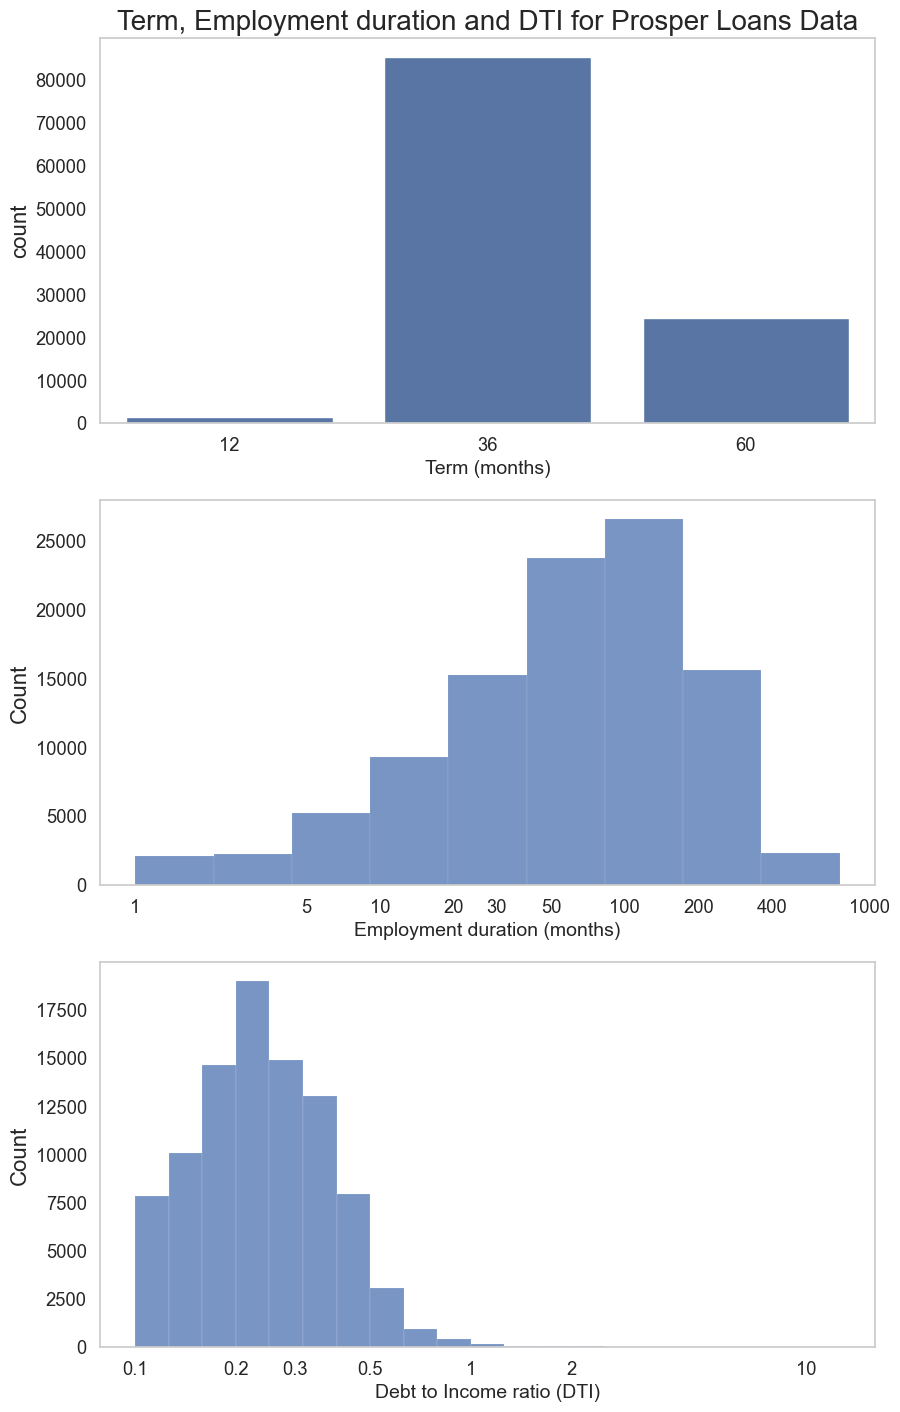

In [149]:
fig, ax = plt.subplots(nrows=3, figsize = [10,17])

sns.countplot(data = loan_df, x = 'term', color = default_color, ax = ax[0]);
sns.histplot(data = loan_df, x = 'employment_duration', color = default_color, ax = ax[1], bins=bins_emp);
sns.histplot(data = loan_df, x = 'dti', color = default_color, ax = ax[2], bins = bins);
ax[0].set_title('Term, Employment duration and DTI for Prosper Loans Data')
ax[0].set_xlabel('Term (months)', fontsize=14);
ax[1].set_xlabel('Employment duration (months)', fontsize=14);
ax[1].set_xscale('log')
ax[1].set_xticks([1, 5, 1e1, 2e1, 3e1, 5e1, 1e2, 2e2, 4e2, 1e3])
ax[1].set_xticklabels([1, 5, 10, 20, 30, 50, 100, 200, 400, 1000]);

ax[2].set_xlabel('Debt to Income ratio (DTI)', fontsize=14);
ax[2].set_xscale('log')
ax[2].set_xticks([1e-1, 2e-1, 3e-1, 5e-1, 1, 2, 10])
ax[2].set_xticklabels([.1, .2, .3, .5, 1, 2, 10]);

**Term**
- There are 3 terms, 12, 36 and 60 month
- Vast majority fall into 36 month term, with about quarter being 60 months long

**Employment duration**
- It's the lifetime employment, higher values representing older borrowers and low values being younger or people who haven't been employed for long.
- It's left skewed with mean just below 100

**Debt to income ratio**
- Falls between .1 and .5 with extremes falling outside of this range
- center between .2 and .3

- We will not look at the distribution of credit lines, rating and delinquencies.

In [507]:
loan_df.credit_lines.median()

25.0

In [473]:
loan_df.delinquencies.value_counts().head(10)

0    87688
1    11438
2     4229
3     2031
4     1334
5      884
6      672
7      498
8      385
9      273
Name: delinquencies, dtype: Int64

In [508]:
loan_df.delinquencies.mean()

0.5878808713903163

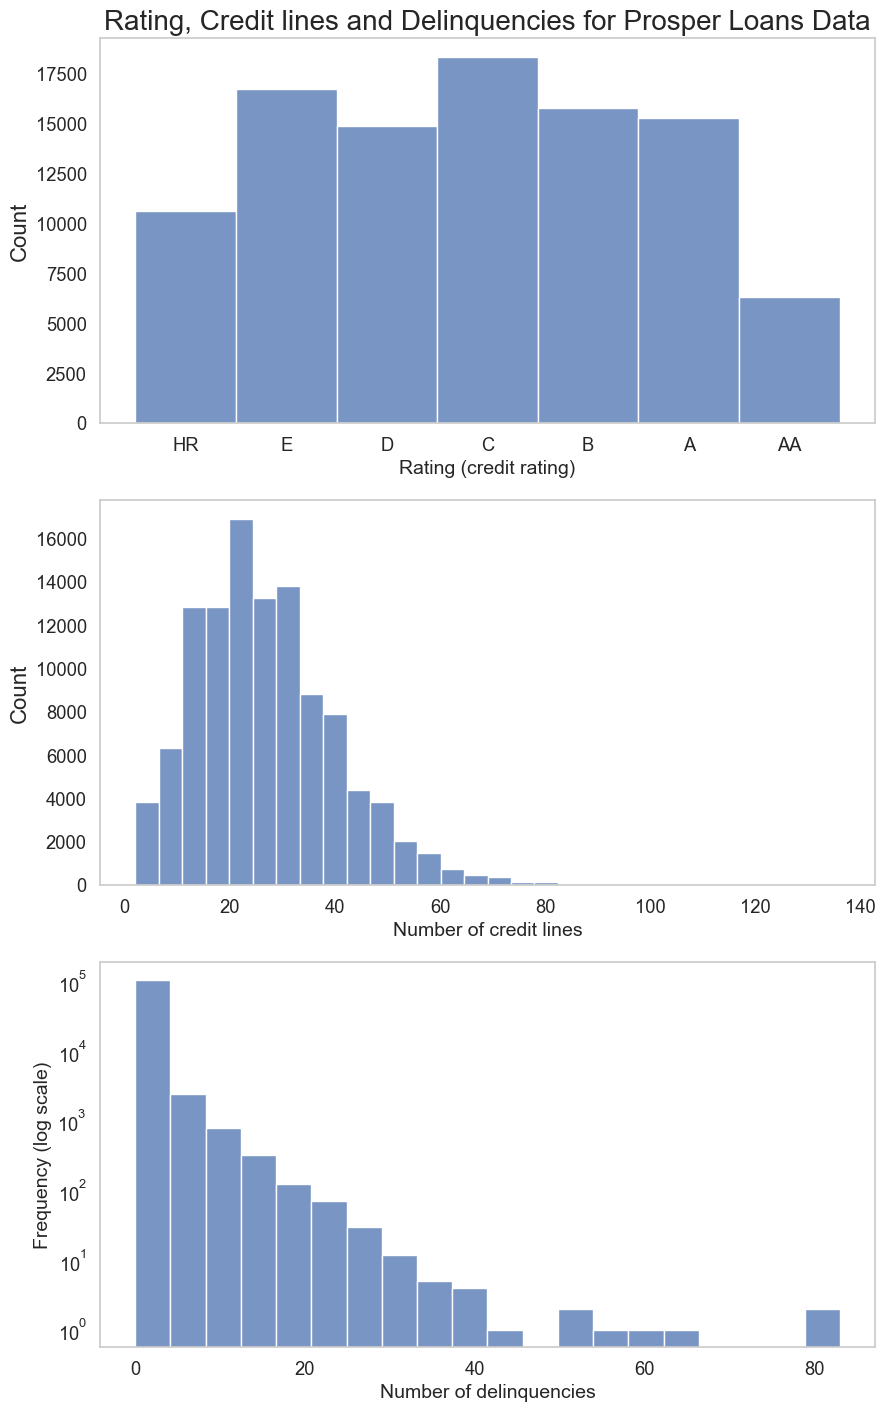

In [34]:
fig, ax = plt.subplots(nrows=3, figsize = [10,17])

sns.histplot(data = loan_df, x = 'rating_alpha', color = default_color, ax = ax[0]);
sns.histplot(data = loan_df, x = 'credit_lines', color = default_color, ax = ax[1], bins=30);
sns.histplot(data = loan_df, x = 'delinquencies', color = default_color, ax = ax[2], bins = 20);
ax[0].set_title('Rating, Credit lines and Delinquencies for Prosper Loans Data');
ax[2].set_yscale('log')
ax[0].set_xlabel('Rating (credit rating)', fontsize=14);
ax[1].set_xlabel('Number of credit lines', fontsize=14);
ax[2].set_xlabel('Number of delinquencies', fontsize=14);
ax[2].set_ylabel('Frequency (log scale)', fontsize=14);

**Rating**
- Distributed  so that most values are in the center and there is drop in the extremes (high risk and AA) 

**Credit lines**
- Right skewed, median of 25  and mean of 28 
- Minimum of 2

**Delinquencies**
- Almost all loans have borrowers with 0 delinquencies at the time their profile is pulled, which makes sense as you don't want to lend to people who aren't able to pay their other loans.
- The mean is .6, with median and mode of 0

- We want to look at investors and category of loans, and how they are distributed.

In [513]:
loan_df.investors.value_counts().head(10)

1     27702
2      1366
3       984
4       803
5       726
8       723
6       699
10      697
9       691
11      689
Name: investors, dtype: int64

In [527]:
loan_df.investors.max()

1189

In [32]:
LogMin, LogMax = np.log10(loan_df['investors'].min()),np.log10(loan_df['investors'].max())
bins = np.logspace(LogMin, LogMax,10)

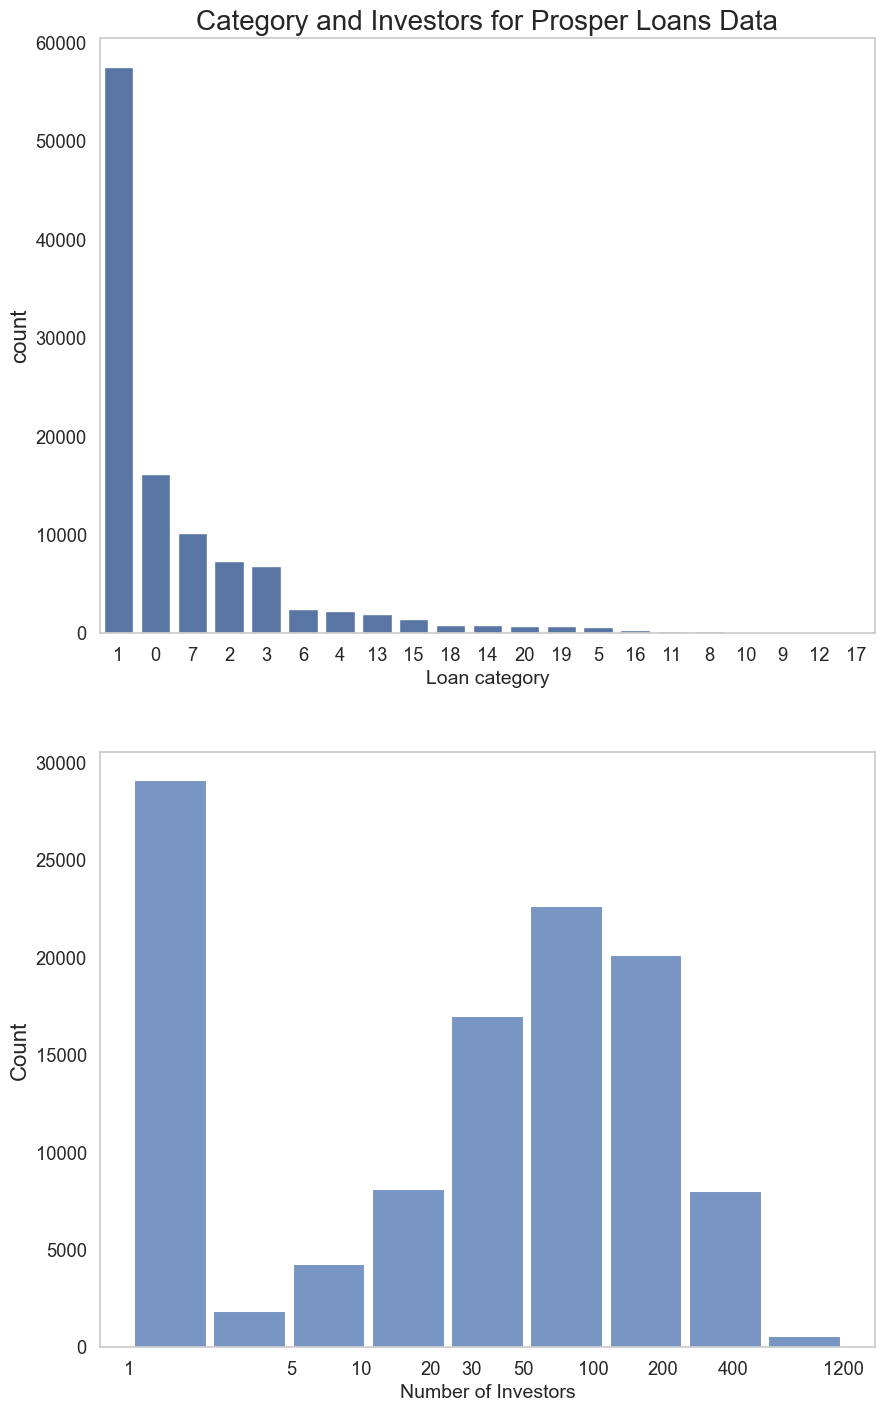

In [33]:
fig, ax = plt.subplots(nrows=2, figsize = [10,17])

sns.countplot(data = loan_df, x = 'category', color = default_color, ax = ax[0]);
sns.histplot(data = loan_df, x = 'investors', color = default_color, ax = ax[1], bins=bins, shrink=.9);
ax[0].set_title('Category and Investors for Prosper Loans Data');
ax[0].set_xlabel('Loan category', fontsize=14);
ax[1].set_xlabel('Number of Investors', fontsize=14);
ax[1].set_xscale('log')
ax[1].set_xticks([1, 5, 1e1, 2e1, 3e1, 5e1, 1e2, 2e2, 4e2, 1.2e3])
ax[1].set_xticklabels([1, 5, 10, 20, 30, 50, 100, 200, 400, 1200]);

**Loan category**
- Debt consolidation, `not available` and `other` make up top 3. 
- Followed by Home improvement and business loans making the top 5, after which there is huge fall-off.

**Investors**
- Nearly 28 000 loans with 1 investor, 2 at 1366 and then below 1000 for the other values.
- Looking at log scale, we get better picture of the data, having over 20 000 loans with 50 to 100 investors and between 100 to 200 investors each.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- For the monthly income we used a logarithmic scale and got a normal distribution around $5000.
- The loan amount, though obvious, is a bit of a surprise how much these loans are around 'round' numbers. You would expect people to take loans for things that are fixed cost, and that those costs aren't round as frequently as these loans are.
- For delinquencies we used log scale on the y-axis as there are large differences in frequencies.
- Employment duration is also logarithmic on x-axis as there are large differences.
- Majority of loans are debt consolidation.
- Failure rates of loans was much higher than I expected.
- Loan amount distribution was also completely different from income distribution as if they had no direct relationship.
- APR, loan and payment amount also don't have distributions that look the same.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- A lot of the loans are for debt consolidation, when I expected most loans to be towards purchasing goods.

- Most loans are Current, and given the 60 term max, it would mean the bank is growing fast or it's relatively new.

- We have APR and loan amount, there were a lot of loans with wrong monthly payments, of those that were below our estimate by 20% we adjusted the payment amount to the ones provided in the PMT function.

- We removed a borrower with 1.7M monthly income as it was either that or excluding that borrow on every figure they distort.

<a id='bivar_exploration'></a>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [35]:
loan_df.dtypes

member_key                     object
loan_key                       object
term                            int64
status                       category
start_date             datetime64[ns]
closed_date            datetime64[ns]
category                     category
loan_amount                     int64
payment_amount                float64
apr                           float64
investors                       int64
credit_lines                    Int64
delinquencies                   Int64
dti                           float64
stated_income                 float64
income_verifiable                bool
state                          object
employment_duration             Int64
is_homeowner                     bool
past_due                     category
rating_alpha                 category
success                        object
dtype: object

In [36]:
numeric_vars = ['loan_amount', 'term', 'payment_amount', 'dti', 'delinquencies', 'credit_lines', 'stated_income', 'employment_duration', 'investors','apr']
categoric_vars = ['status', 'category', 'rating_alpha', 'success']


- We will use correlation plot to see how strongly these numeric variables relate.

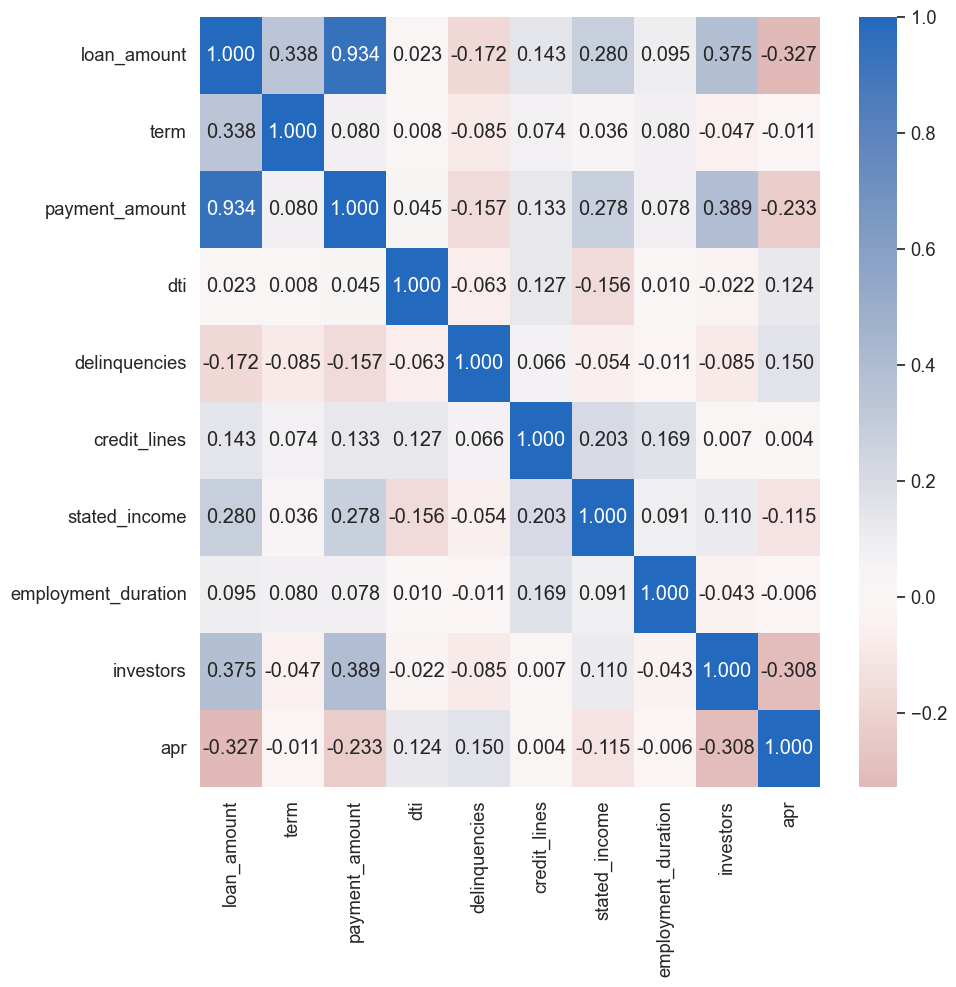

In [206]:
# correlation plot
plt.figure(figsize = [10, 10])
sns.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

- As loan amounts increase we see increase in investors, length of term, increase in borrower income. 
- These are all expected as factors for loan amounts.
- Short smaller loans have higher APR, also expected as fees will make up a bigger proportion of the loan.
- Surprised to see how little dti plays role

In [37]:
palette_colors = {True: sns.color_palette()[0], False: sns.color_palette()[1]}

- Looking at ratings we will try to see how they relate to different variables.

In [450]:
income_df = loan_df.groupby(['rating_alpha']).agg({'stated_income': [lambda x:np.mean(x)]}).reset_index()
income_df = pd.DataFrame(income_df.values, columns = ['Rating', 'Income'])

In [462]:
employment_df = loan_df.groupby(['rating_alpha']).agg({'employment_duration': [lambda x:np.mean(x)]}).reset_index()
employment_df = pd.DataFrame(employment_df.values, columns = ['Rating', 'Employment Duration'])

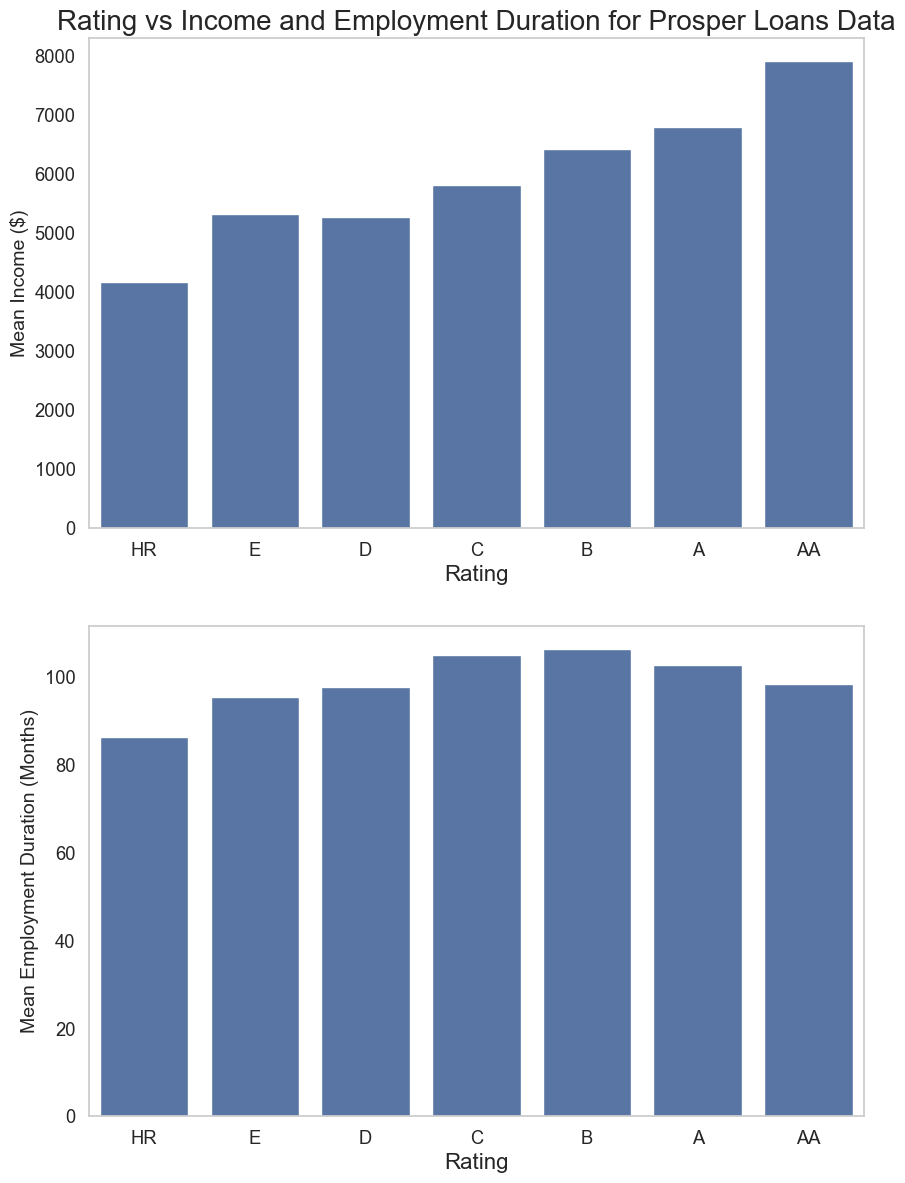

In [465]:
fig, ax = plt.subplots(nrows=2, figsize = [10,14])

sns.barplot(data=income_df, x='Rating', y='Income', color=default_color, ax = ax[0]);
sns.barplot(data=employment_df, x='Rating', y='Employment Duration', color=default_color, ax = ax[1]);
ax[0].set_title('Rating vs Income and Employment Duration for Prosper Loans Data');
ax[0].set_ylabel('Mean Income ($)', fontsize=14);
ax[1].set_ylabel('Mean Employment Duration (Months)', fontsize=14);

- Income mean ranges from 4000 to nearly 8000.
- The income of High Risk is nearly half of that of AA.
- Employment duration while it increases from HR isn't related to ratings.

In [95]:
success_df = loan_df.groupby(['rating_alpha', 'success']).size().reset_index(name='count')
success_df = success_df.pivot(index = 'rating_alpha', columns = 'success', values = 'count').reset_index()

success_df['success_rate'] = success_df[True]/(success_df[False]+success_df[True])
success_df

In [111]:
homeowner_df = loan_df.groupby(['rating_alpha', 'is_homeowner']).size().reset_index(name='count')
homeowner_df = homeowner_df.pivot(index = 'rating_alpha', columns = 'is_homeowner', values = 'count').reset_index()

homeowner_df['homeownership_rate'] = homeowner_df[True]/(homeowner_df[False]+homeowner_df[True])
homeowner_df

In [541]:
success_df

success,rating_alpha,False,True,success_rate
0,HR,3375,4480,0.570337
1,E,2609,5303,0.670248
2,D,1957,4949,0.716623
3,C,1051,3650,0.776431
4,B,774,3483,0.818182
5,A,617,4328,0.875228
6,AA,151,2744,0.947841


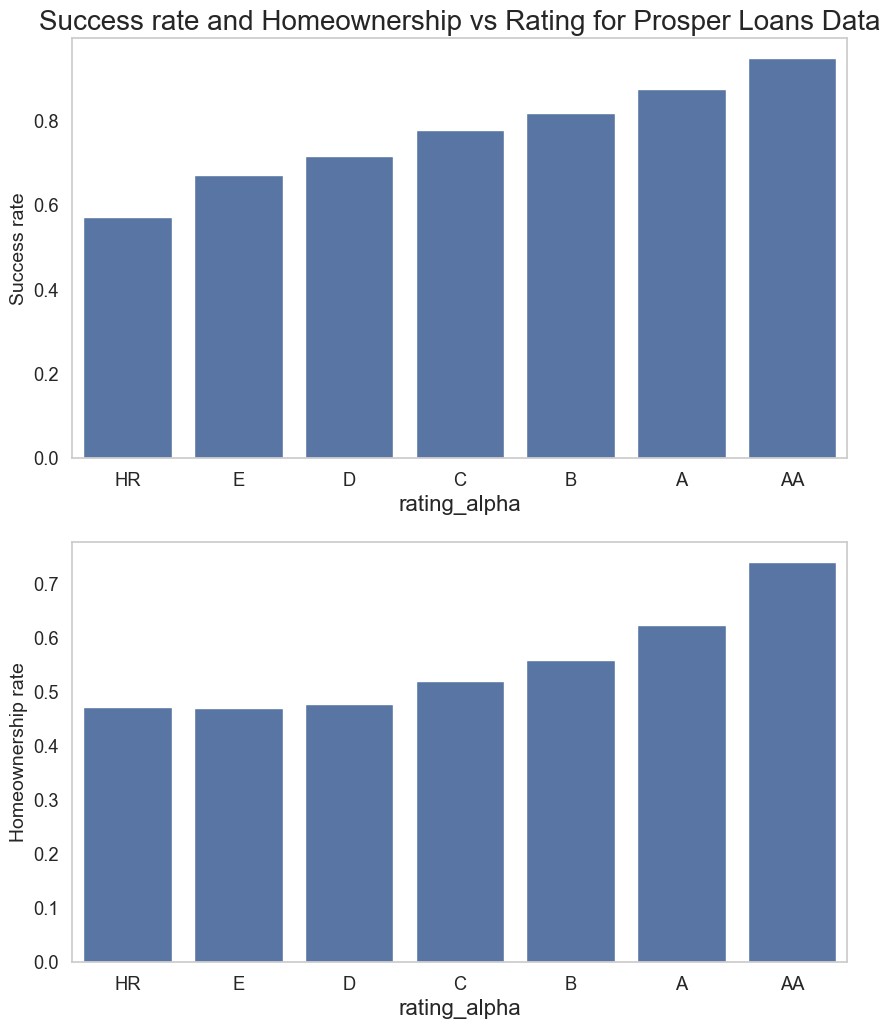

In [121]:
fig, ax = plt.subplots(nrows=2, figsize = [10,12])
sns.barplot(data=success_df, x='rating_alpha', y='success_rate', color=default_color, ax = ax[0]);
sns.barplot(data=homeowner_df, x='rating_alpha', y='homeownership_rate', color=default_color, ax = ax[1]);
ax[0].set_title('Success rate and Homeownership vs Rating for Prosper Loans Data');
ax[0].set_ylabel('Success rate', fontsize=14);
ax[1].set_ylabel('Homeownership rate', fontsize=14);

- As the rating increases we see a large increase in the rate of success for loans.
- We also see that above D rating the rate of homeownership increases, going from 52% at C to 74% in AA.

- We will look at states and loan categories and how they are distributed along different variables.

- Income for each state, and the destribution.

In [492]:
state_income_df = pd.DataFrame(loan_df.groupby(['state']).agg({'stated_income':[np.mean]}).reset_index().rename(columns={'mean': 'income'}).values, columns=['state', 'income']).sort_values(by='income')

In [505]:
extreme_10_state = list(state_income_df.state[0:10]) + list(state_income_df.state[-10:])

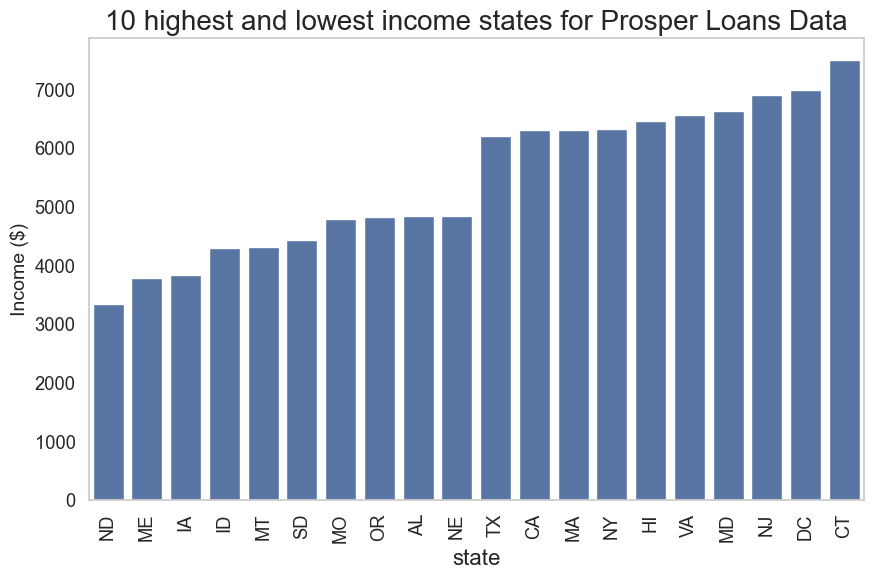

In [508]:
fig, ax = plt.subplots(nrows=1, figsize = [10,6])
sns.barplot(data=state_income_df, x='state', y='income', color=default_color, ax = ax, order=extreme_10_state);
ax.set_title('10 highest and lowest income states for Prosper Loans Data');
ax.set_ylabel('Income ($)', fontsize=14);
ax.set_xticklabels(extreme_10_state, rotation = 90);

- The state with highest mean income has more than twice the lowest.
- Expect these numbers to reflect on each states loan outcome to some degree.

In [172]:
category_df = loan_df.groupby(['category', 'success']).size().reset_index(name='count')
category_df = category_df.pivot(index = 'category', columns = 'success', values = 'count').reset_index()
category_df['success_rate'] = category_df[True]/(category_df[False]+category_df[True])
category_df = category_df.sort_values(by='success_rate')

In [322]:
category_df.head()

success,category,False,True,success_rate
19,12,9,9,0.500000
1,0,6441,9773,0.602751
7,13,206,338,0.621324
8,15,125,225,0.642857
4,3,1302,2682,0.673193


In [200]:
extreme_category = [12,0,13,15,3,6,9,16,11,17]
category_names = ['Green loans', 'Not available', 'Household expenses', 'Medical/dental', 'Business', 'Auto', 'Boat', 'Motorcycle', 'Engagement Ring', 'RV']

In [156]:
state_df = loan_df.groupby(['state', 'success']).size().reset_index(name='count')
state_df = state_df.pivot(index = 'state', columns = 'success', values = 'count').reset_index()
state_df['success_rate'] = state_df[True]/(state_df[False]+state_df[True])
state_df = state_df.sort_values(by='success_rate')

In [168]:
extreme_states = [0,1,2,3,4,46,47,48,49,50]

- Success rate of top and bottom 5 states and categories

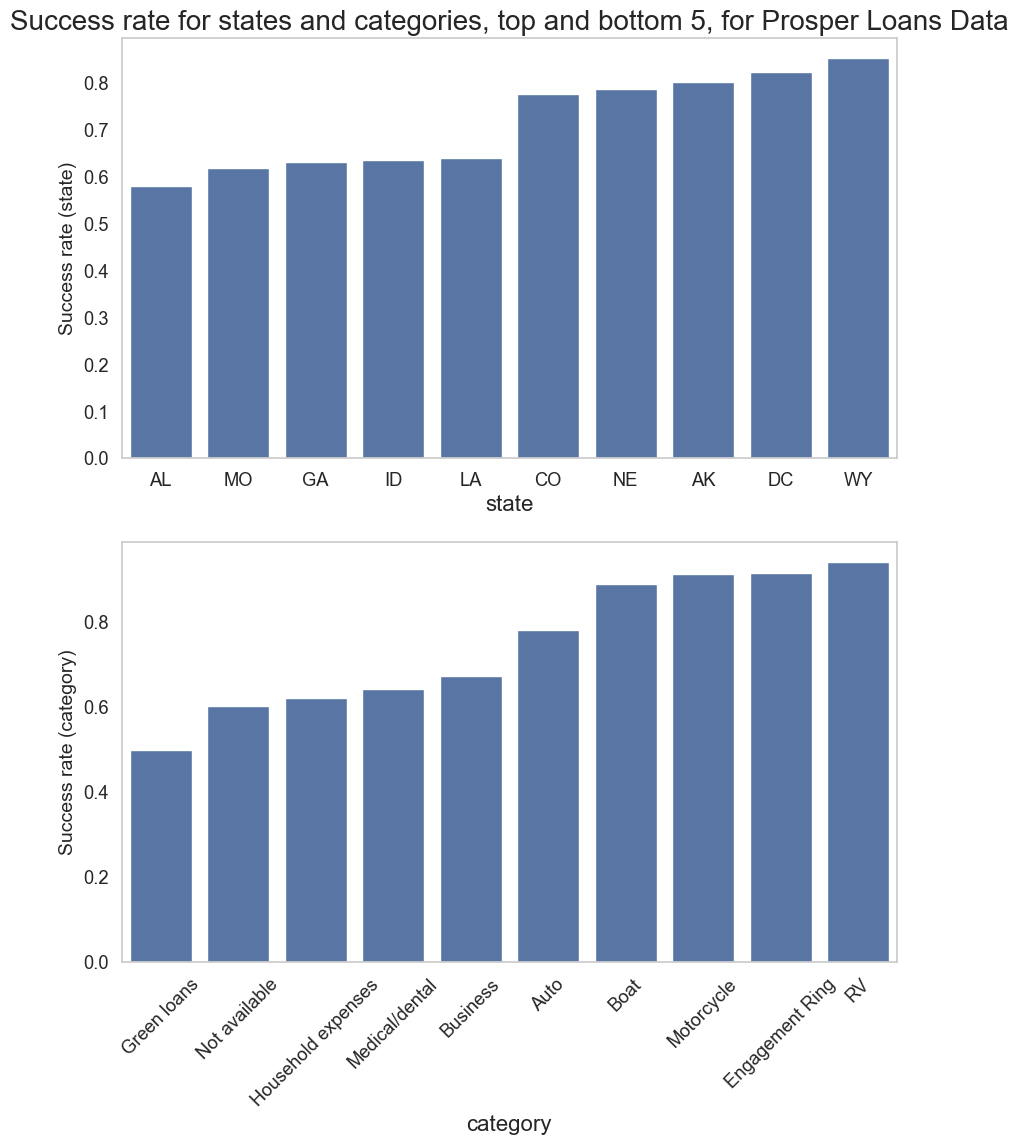

In [237]:
fig, ax = plt.subplots(nrows=2, figsize = [10,12])
sns.barplot(data=state_df.iloc[extreme_states], x='state', y='success_rate', color=default_color, ax = ax[0]);
sns.barplot(data=category_df, x='category', y='success_rate', color=default_color, ax = ax[1], order=extreme_category);
ax[0].set_title('Success rate for states and categories, top and bottom 5, for Prosper Loans Data');
ax[0].set_ylabel('Success rate (state)', fontsize=14);
ax[1].set_ylabel('Success rate (category)', fontsize=14);
ax[1].set_xticklabels(category_names, rotation = 45);

- Some states have low success rate, the smaller states have high successrate.
- Perhaps lower cost of living in these less populated states allows people to be in better financial state.
- Engagement ring having high successrate (but not weddings) is a surprise. I expected green loans to be higher. Mdical/dental along with business bankruptcy is expected, but not household loans.


- Category vs loan amount, income and DTI in violin plot, top and bottom 5.
- Are there trends in the density of observations?

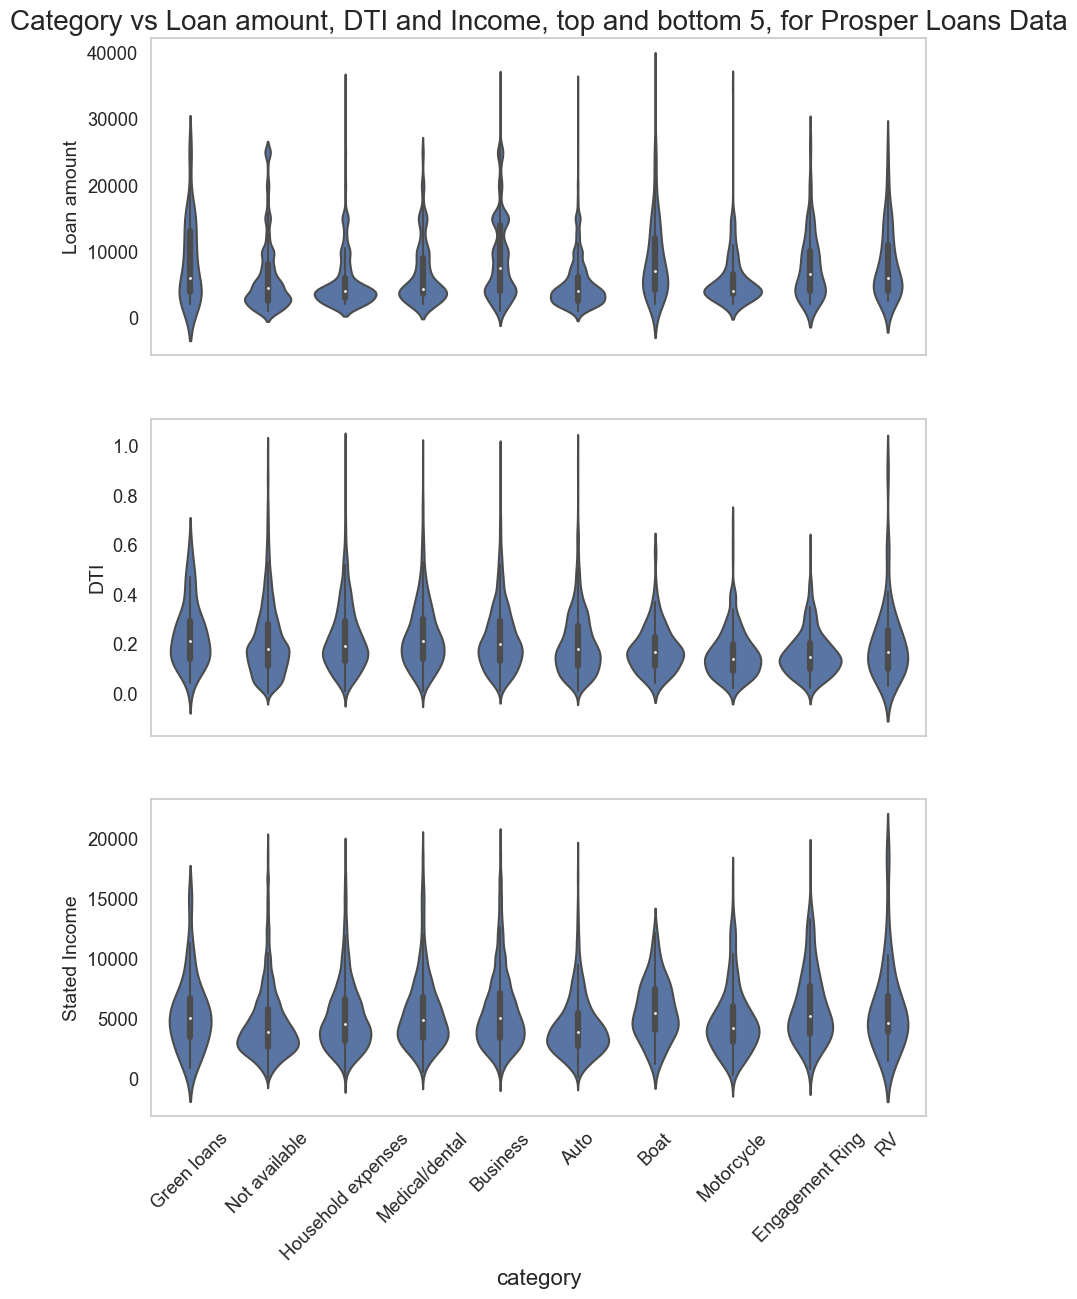

In [289]:
fig, ax = plt.subplots(nrows=3, figsize = [10,14])
sns.violinplot(x="category", y="loan_amount", data=loan_df, color=default_color, order=extreme_category, ax = ax[0]);
sns.violinplot(x="category", y="dti", data=loan_df.query("dti < 1"), color=default_color, order=extreme_category, ax = ax[1]);
sns.violinplot(x="category", y="stated_income", data=loan_df.query("stated_income < 20000"), color=default_color, order=extreme_category, ax = ax[2]);
ax[0].set_title('Category vs Loan amount, DTI and Income, top and bottom 5, for Prosper Loans Data');
ax[0].set_ylabel('Loan amount', fontsize=14);
ax[0].set_xlabel('');
ax[1].set_xlabel('');
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
ax[1].set_ylabel('DTI', fontsize=14);
ax[2].set_ylabel('Stated Income', fontsize=14);
ax[2].set_xticklabels(category_names, rotation = 45);

- Cost of RV, Engagement Rings and Boats has a long distribution, where people buy these things as luxury and their spending is likely associated with their income 
- Auto and Motorcycle loans along with Household expenses are very well defined around a low median and shorter interquirtile range.
- Boat owners tend to have higher income

- We will look at 2 groups, they aren't exclusive, but we should be able to see some trends if they don't overlap much.
- First group is those who take loans for wedding and engagement ring.
- The second is those who take loans for business, RV and Boats.

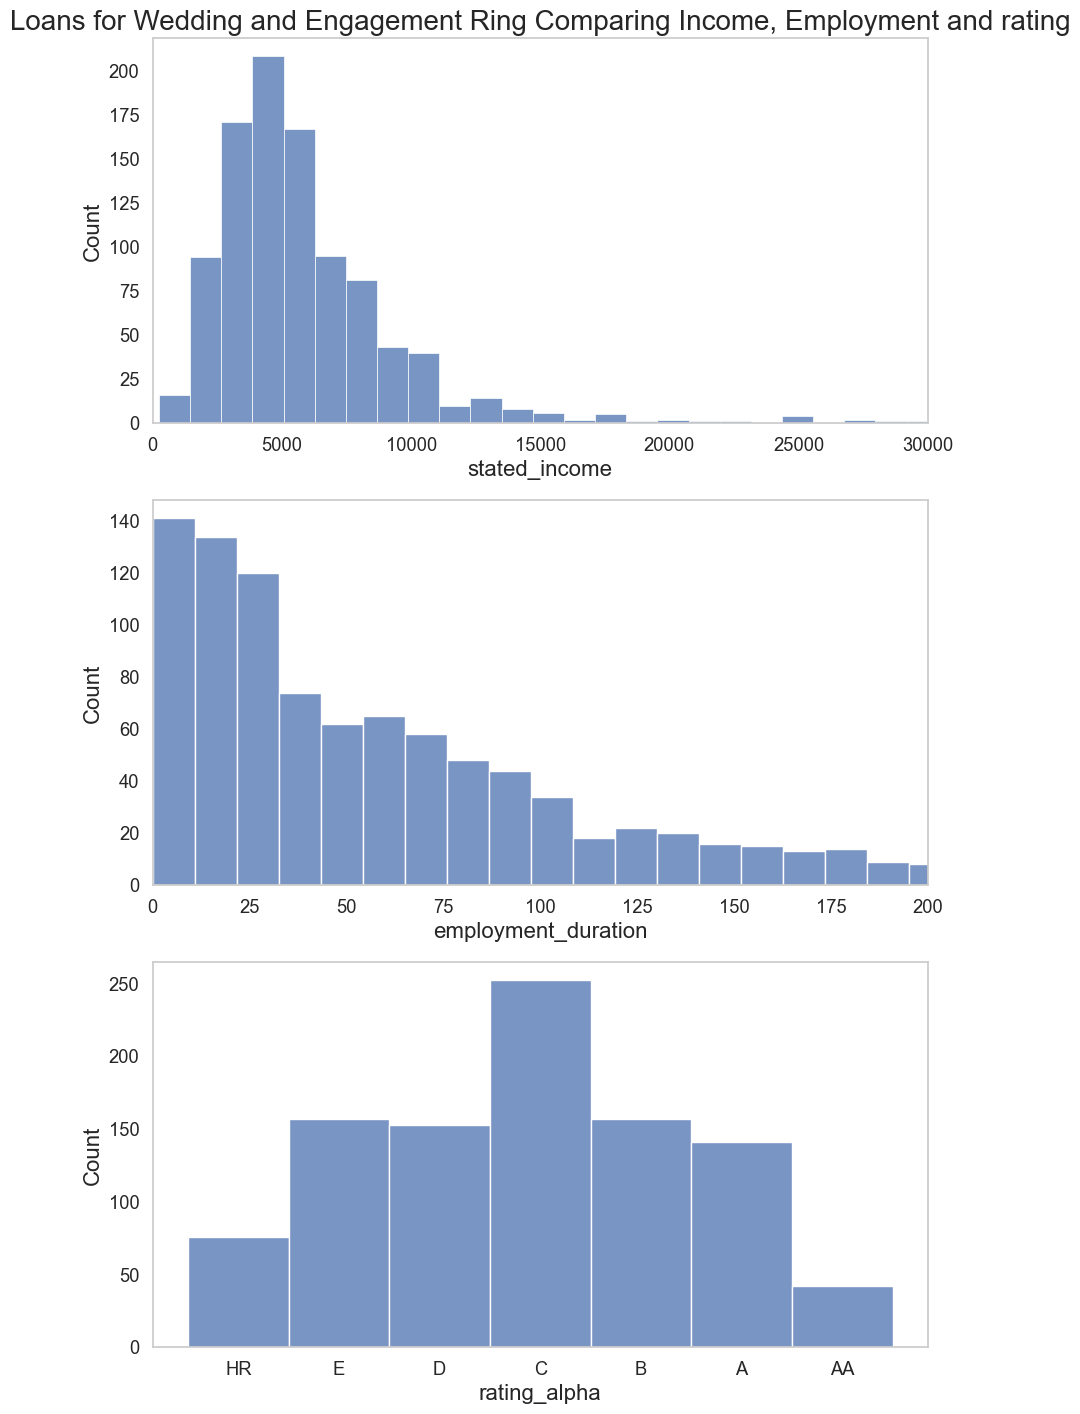

In [304]:
fig, ax = plt.subplots(nrows=3, figsize = [10,17])
sns.histplot(data = loan_df.query("category in [11,20]"), x = 'stated_income', color = default_color, ax = ax[0], bins=100);
sns.histplot(data = loan_df.query("category in [11,20]"), x = 'employment_duration', color = default_color, ax = ax[1], bins=50);
sns.histplot(data = loan_df.query("category in [11,20]"), x = 'rating_alpha', color = default_color, ax = ax[2], bins=50);
ax[0].set_xlim(0,30000)
ax[1].set_xlim(0,200)
ax[0].set_title('Loans for Wedding and Engagement Ring Comparing Income, Employment and rating');

- Short employment duration with large number being 50 or lower months.
- Rating mode of C and very few in AA.
- Income looks like the population.

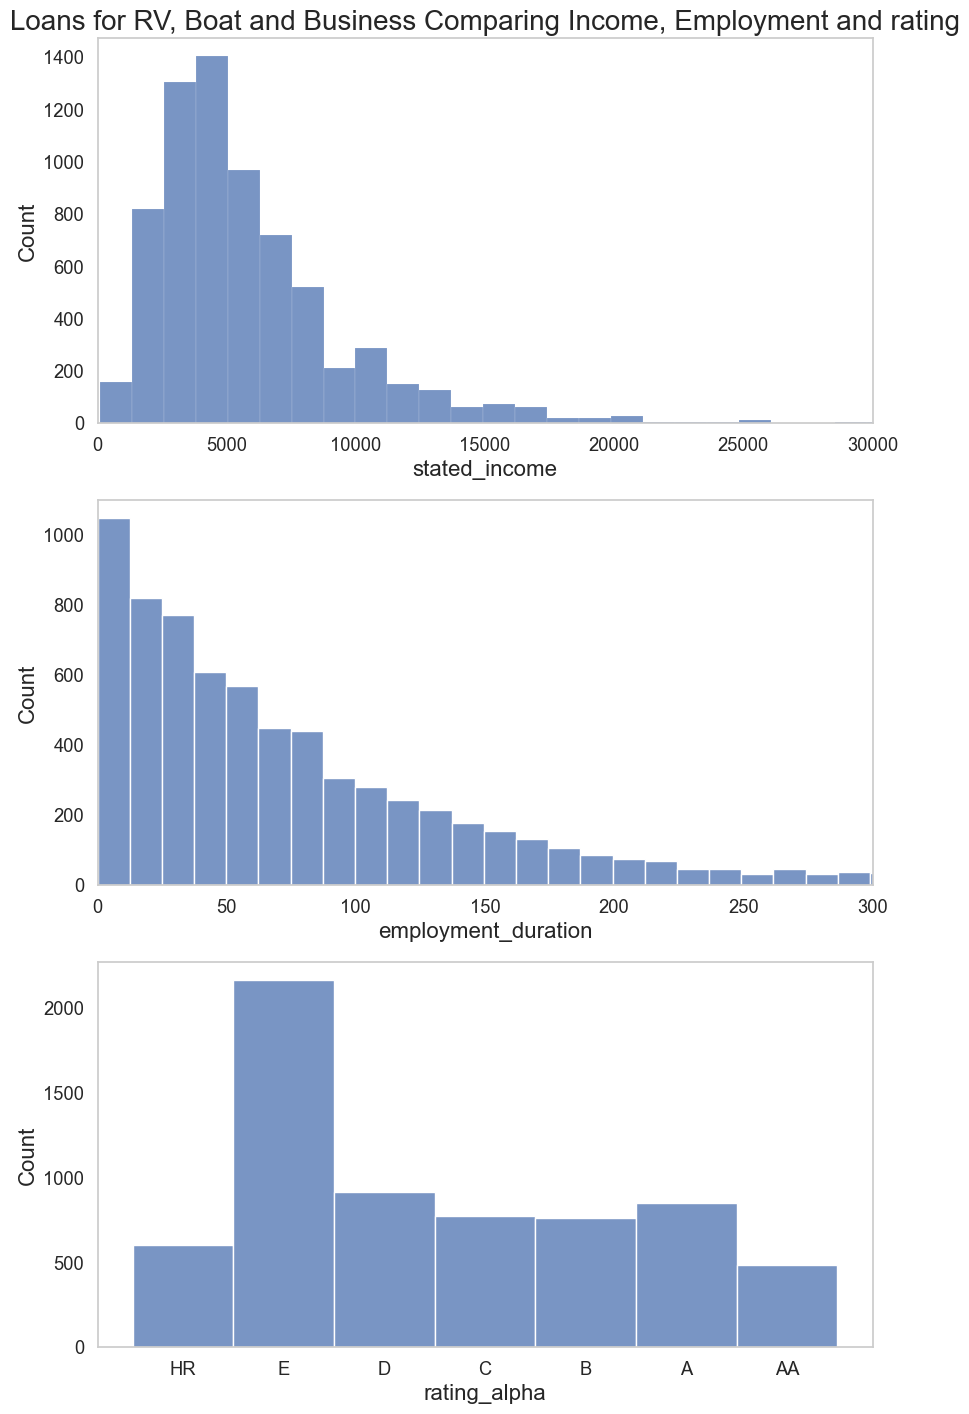

In [305]:
fig, ax = plt.subplots(nrows=3, figsize = [10,17])
sns.histplot(data = loan_df.query("category in [3,9, 17]"), x = 'stated_income', color = default_color, ax = ax[0], bins=500);
sns.histplot(data = loan_df.query("category in [3,9, 17]"), x = 'employment_duration', color = default_color, ax = ax[1], bins=50);
sns.histplot(data = loan_df.query("category in [3,9, 17]"), x = 'rating_alpha', color = default_color, ax = ax[2], bins=50);
ax[0].set_xlim(0,30000)
ax[1].set_xlim(0,300)
ax[0].set_title('Loans for RV, Boat and Business Comparing Income, Employment and rating');

In [307]:
loan_df.query("category in [11,20]").employment_duration.mean(),loan_df.query("category in  [3,9, 17]").employment_duration.mean()

(72.64585465711362, 80.4060042887777)

- Employment duration that is is approximately 10% longer.
- More spread out rating, with mode of E.

- Removing business and looking at investors for RV and Boat loans compared to wedding and engagement ring.

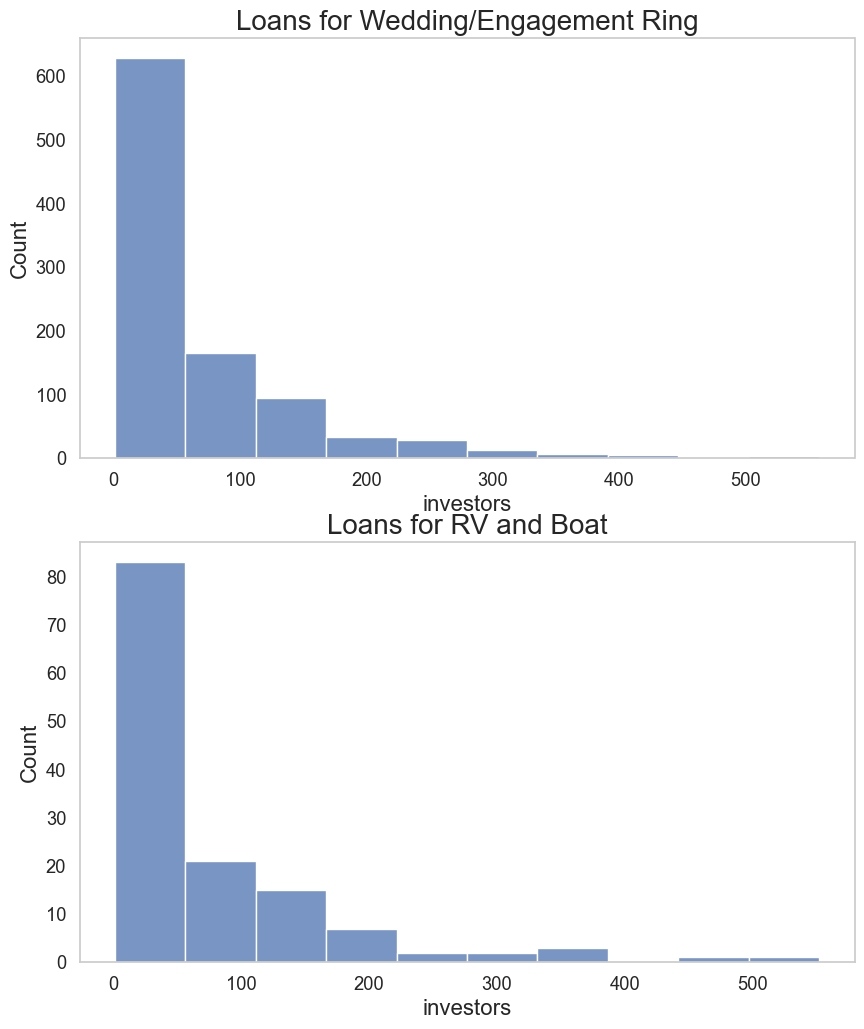

In [333]:
fig, ax = plt.subplots(nrows=2, figsize = [10,12])
sns.histplot(data = loan_df.query("category in [11, 20]"), x = 'investors', color = default_color, bins=10, ax = ax[0]);
sns.histplot(data = loan_df.query("category in [9,17]"), x = 'investors', color = default_color, bins=10, ax = ax[1]);
ax[0].set_title('Loans for Wedding/Engagement Ring');
ax[1].set_title('Loans for RV and Boat');


- About the same distribution.

### Rating against  Delinquency, Loan amount and APR

- Ratings compared to loan amount, APR and delinquency.

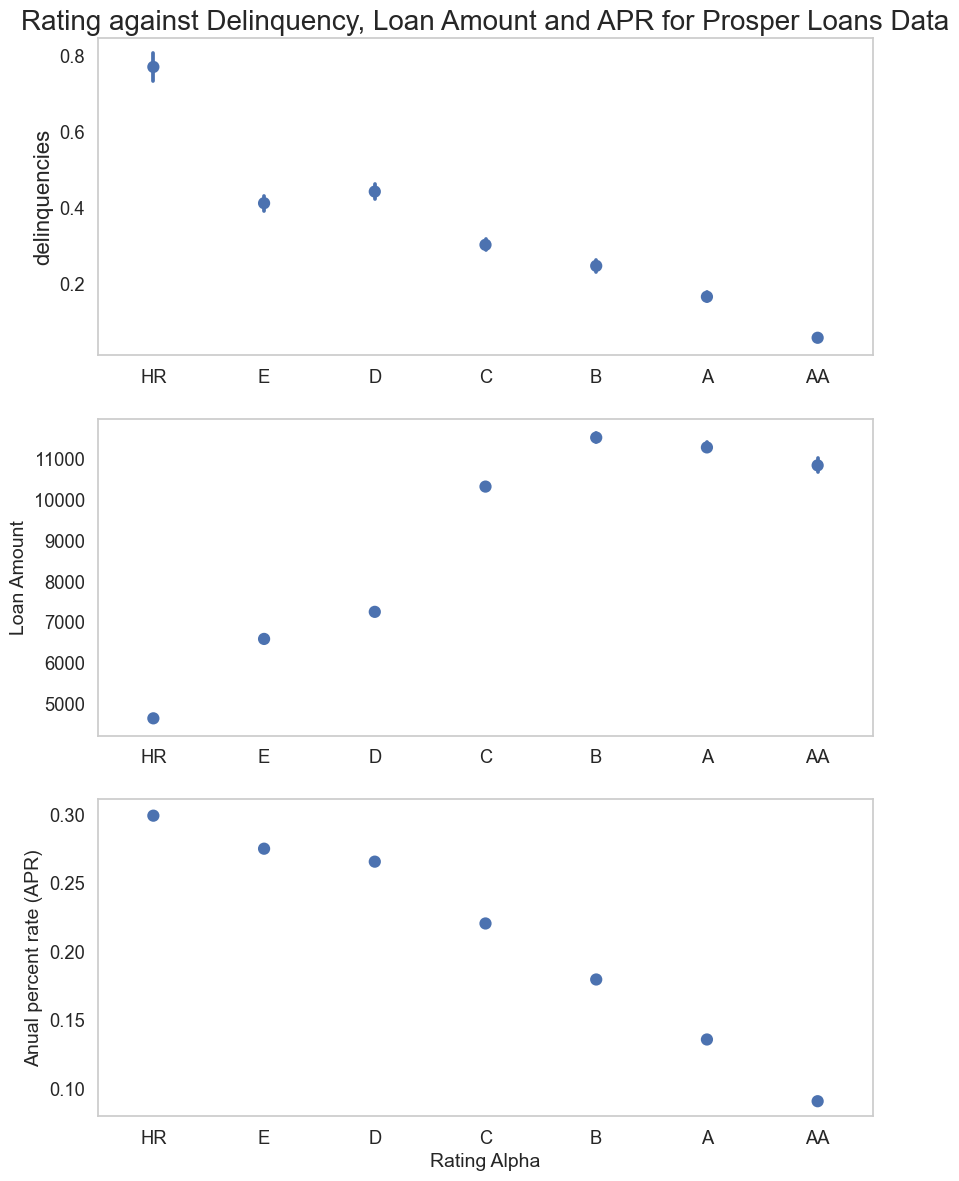

In [338]:
fig, ax = plt.subplots(nrows=3, figsize = [10,14])

sns.pointplot(x='rating_alpha', y='delinquencies', data=loan_df.dropna(subset=['delinquencies']), estimator=np.mean, join=False, ax = ax[0]);
sns.pointplot(x="rating_alpha", y="loan_amount", data=loan_df.dropna(subset=['rating_alpha']), estimator=np.mean, join=False, ax = ax[1]);
sns.pointplot(x="rating_alpha", y="apr", data=loan_df.dropna(subset=['rating_alpha']), estimator=np.mean, join=False, ax = ax[2]);
ax[0].set_title('Rating against Delinquency, Loan Amount and APR for Prosper Loans Data');
ax[0].set_xlabel('', fontsize=14);
ax[1].set_xlabel('', fontsize=14);
ax[1].set_ylabel('Loan Amount', fontsize=14);
ax[2].set_ylabel('Anual percent rate (APR)', fontsize=14);
ax[2].set_xlabel('Rating Alpha', fontsize=14);

- Delinquencies go down with rating, stated otherwise, people who are delinquent get rating downgrades.
- We first stated that the APR is lower for bigger loans due to fees making smaller difference, it a bit clearer now that we know loan amounts are related to ratings.
- Loan amount increases with ratings as lenders are more trusting of them.
- There is also the much lower APR on account of reduced risk, making it viable to go for bigger loans.
- We also saw many high earners taking small loans, and the APR graph may be a reason for them to take relatively small loans with low rates.

- DTI and Income to Rating, we expect something similar, with downward trend for DTI and upward trend for income as rating increases.

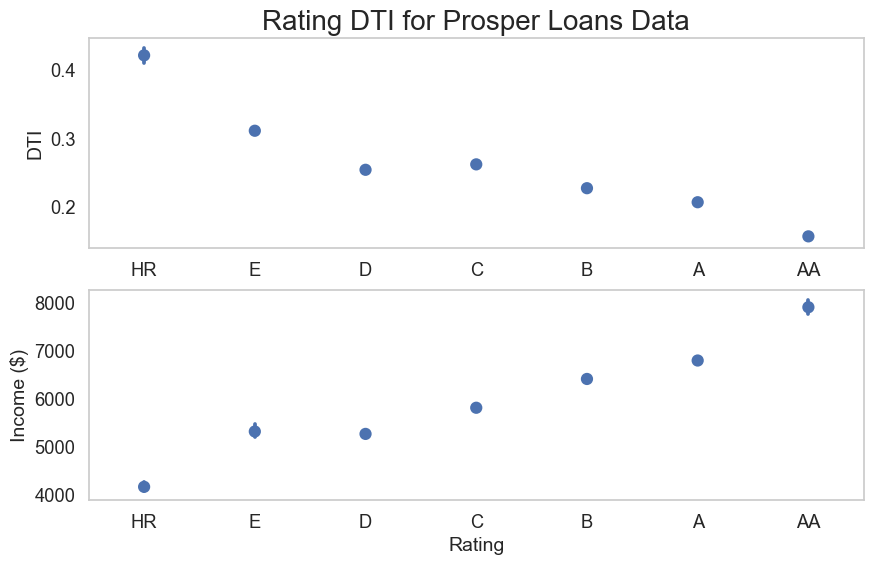

In [349]:
fig, ax = plt.subplots(nrows=2, figsize = [10,6])
sns.pointplot(x="rating_alpha", y="dti", data=loan_df.dropna(subset=['rating_alpha']), estimator=np.mean, join=False, ax=ax[0]);
sns.pointplot(x="rating_alpha", y="stated_income", data=loan_df.dropna(subset=['rating_alpha']), estimator=np.mean, join=False, ax=ax[1]);
ax[0].set_title('Rating DTI for Prosper Loans Data');
ax[0].set_xlabel('', fontsize=14);
ax[0].set_ylabel('DTI', fontsize=14);
ax[1].set_xlabel('Rating', fontsize=14);
ax[1].set_ylabel('Income ($)', fontsize=14);


- DTI goes down from just above .4 to below .2
- Income doubles from low 4000 in high risk to nearly 8000.

- We will look at loan vs payment, we should have a linear relationship, with variation in APR causing difference

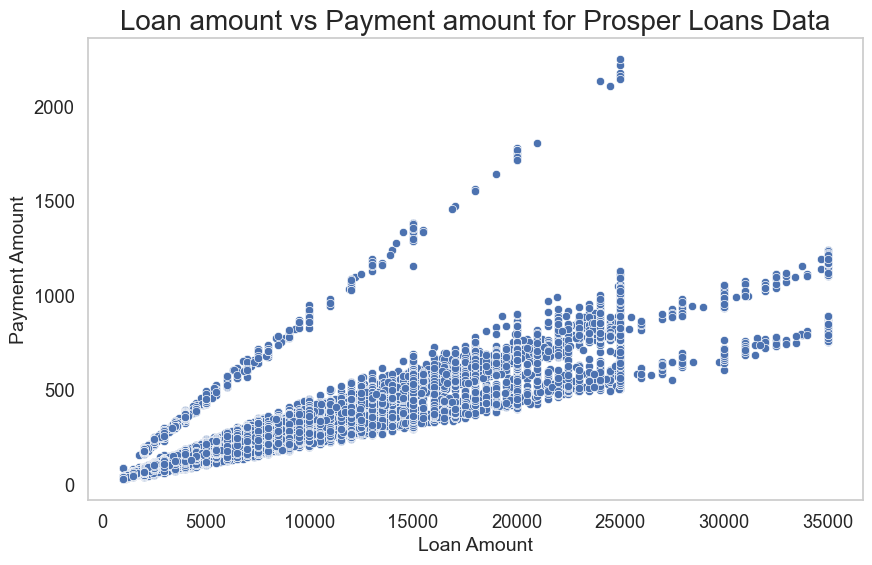

In [354]:
fig, ax = plt.subplots(nrows=1, figsize = [10,6])
ax.set_title('Loan amount vs Payment amount for Prosper Loans Data');
ax.set_xlabel('Loan Amount', fontsize=14);
ax.set_ylabel('Payment Amount', fontsize=14);
sns.scatterplot(data = loan_df, x='loan_amount', y='payment_amount');

- As expected loan amount and payment amount have strong linear relationship.
- There are 3 lines, or groups.

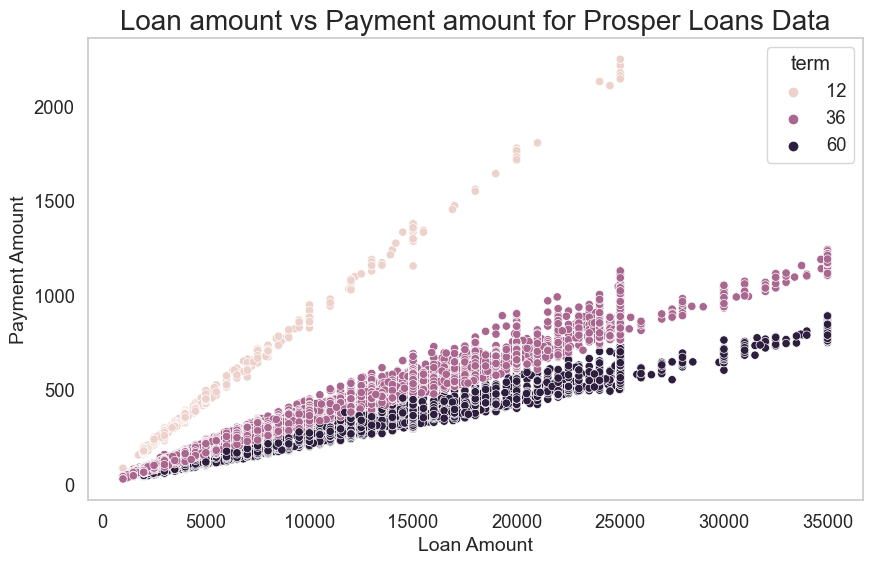

In [353]:
fig, ax = plt.subplots(nrows=1, figsize = [10,6])
ax.set_title('Loan amount vs Payment amount for Prosper Loans Data');
ax.set_xlabel('Loan Amount', fontsize=14);
ax.set_ylabel('Payment Amount', fontsize=14);
sns.scatterplot(data = loan_df, x='loan_amount', y='payment_amount', hue='term');

- Adding hue, we can see they are the term length, short term causing high payments vs loans.

- Income and DTI

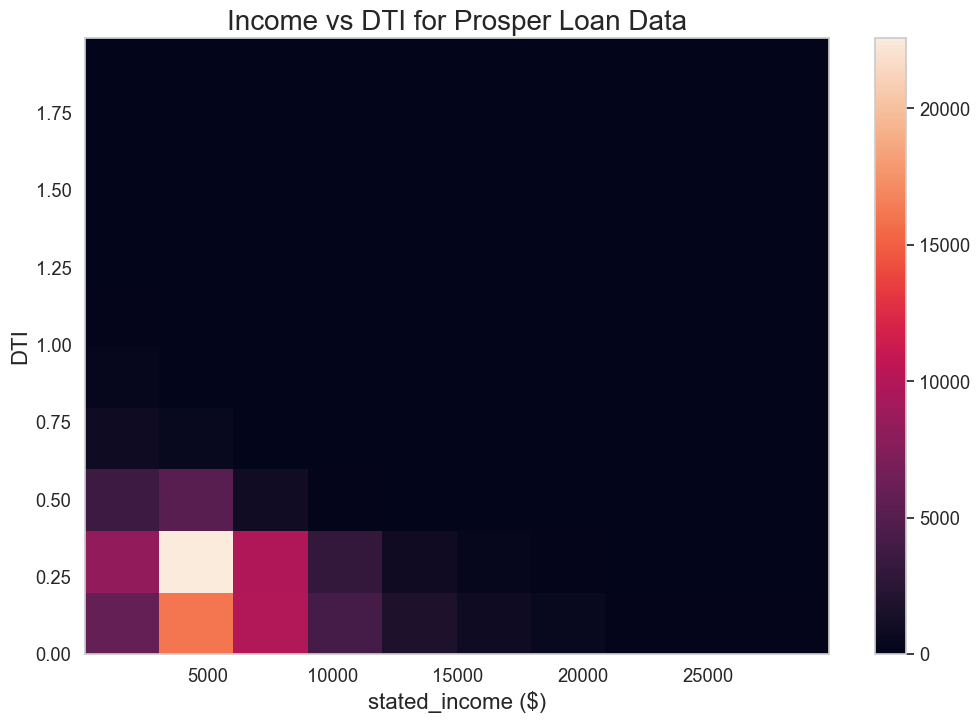

In [537]:
plt.hist2d(data = loan_df.query("stated_income < 30000 & dti < 2").dropna(subset=['loan_amount','employment_duration']), x = 'stated_income', y = 'dti')
plt.colorbar()
plt.title('Income vs DTI for Prosper Loan Data')
plt.xlabel('stated_income ($)')
plt.ylabel('DTI');


- As income increases we see the DTI decrease.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The differences between loan categories is stark, and surprising, some categories have high success rate.
- We also find that employment has little effect on loans and ratings. Income and DTI are much more important and they are reflected in ratings.

- Homeownership is clearly important factor as it shows borrowers have assets and are capable of paying their loans off.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- The differences between states is a lot more surprising than I expected.
- Engagement rings having a high successrate is a surprise as it the failure rate of green loans.

<a id='multi_exploration'></a>

## Multivariate Exploration



- From the previous section we had 3 lines for the payment vs loan amount graph.

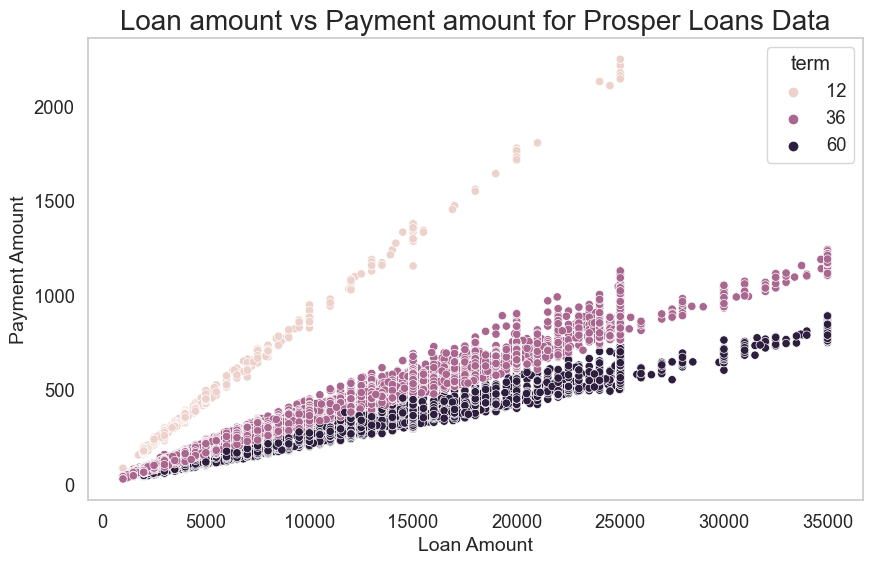

In [353]:
fig, ax = plt.subplots(nrows=1, figsize = [10,6])
ax.set_title('Loan amount vs Payment amount for Prosper Loans Data');
ax.set_xlabel('Loan Amount', fontsize=14);
ax.set_ylabel('Payment Amount', fontsize=14);
sns.scatterplot(data = loan_df, x='loan_amount', y='payment_amount', hue='term');

- Adding hue, we can see they are the term length, short term causing high payments vs loans.

- We will plot the loan rating with investors, and compare success of loans.

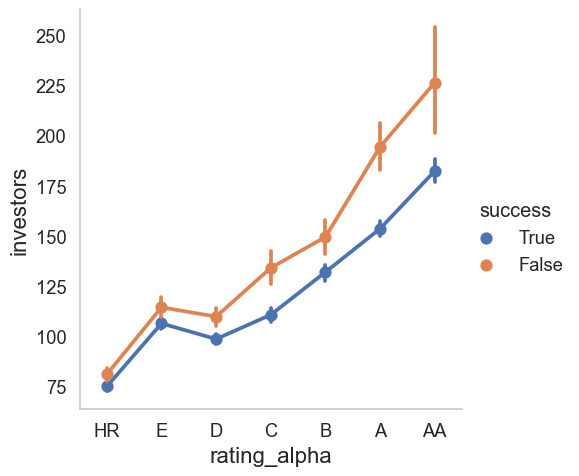

In [222]:
sns.catplot(x ='rating_alpha', y ='investors', 
               hue = 'success', data = loan_df, kind='point');

- There are more investors in failed loans than successful ones given the same rating.

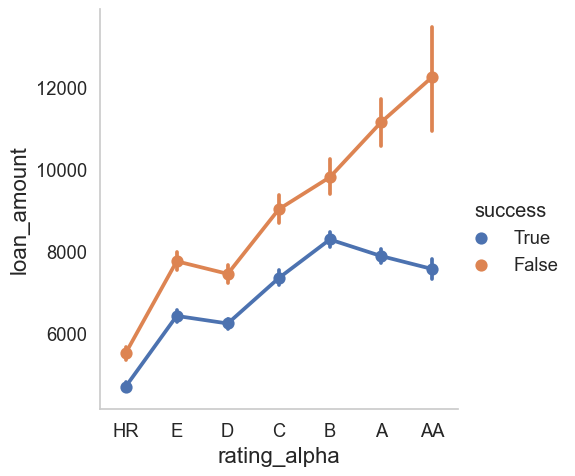

In [223]:
sns.catplot(x ='rating_alpha', y ='loan_amount', 
               hue = 'success', data = loan_df, kind='point');

- It's because of the loan amounts, number of investors increases with the size of the loan.
- Failed loans tend to be bigger loans, if we hold rating constant.

- We will plot FacetGrid with 4 variables.
- Delinquency, DTI across ratings, with success True or False in the rows 

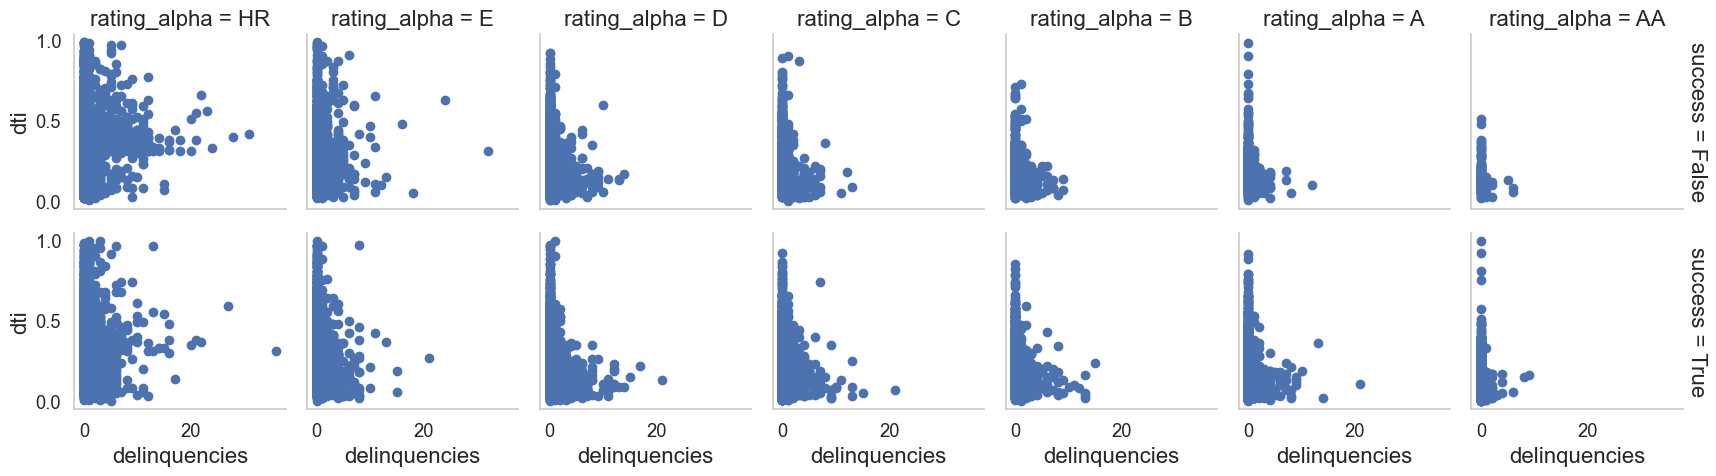

In [516]:
g = sns.FacetGrid(data = loan_df.query("dti < 1").dropna(subset=['rating_alpha','success', 'delinquencies']), col = 'rating_alpha', row = 'success', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'delinquencies', 'dti');


- As ratings increase delinquencies decrease from the extremes of the HR to few reaching above 10.
- DTI is also reduced with the graph trending towards a small triangle on the bottom left.

- APR, Employment vs past_due and homeownership

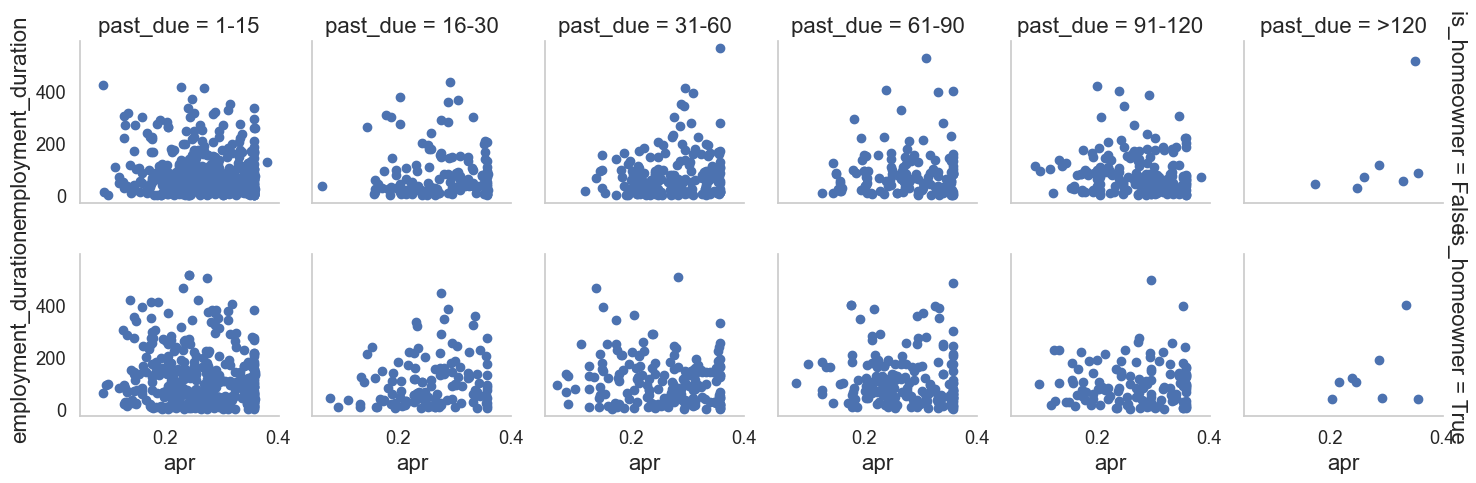

In [527]:
g = sns.FacetGrid(data = loan_df.dropna(subset=['apr','past_due','is_homeowner', 'employment_duration']), col = 'past_due', row = 'is_homeowner', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'apr', 'employment_duration');


- The points move towards bottom right, low APR and long employment tends to lead to successful loan outcomes.
- Homeownership plays less of a role here.

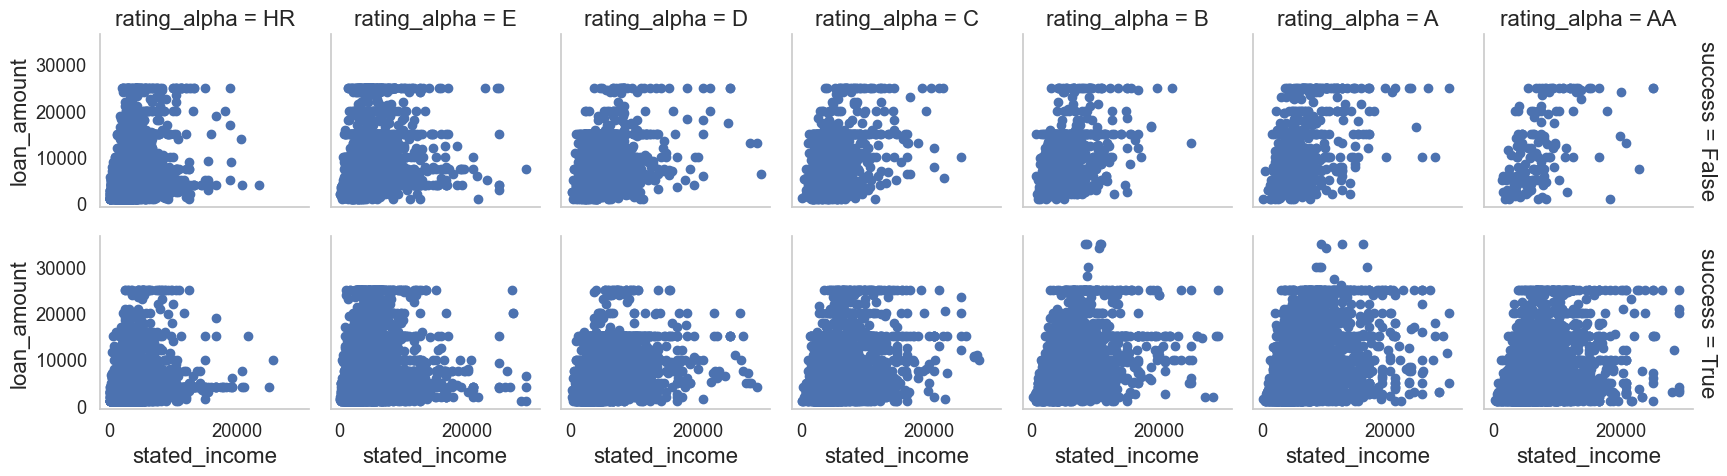

In [533]:
g = sns.FacetGrid(data = loan_df.query("stated_income < 30000").dropna(subset=['apr','rating_alpha', 'loan_amount']), col = 'rating_alpha', row = 'success', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'stated_income', 'loan_amount');

- We can cut a diagonal and see that the loans with higher rate of loan to income will fail a lot more than those below.
- There is also fewer borrowers at the bottom right as it makes little sense to borrow the minimal when you have a high income.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Income plays a major role as it's the means to repay the loan, the more steep the loan vs income gets the more your chances of success decreases. This is also reflected in DTI as people with higher income will 
- Higher loans keeping rating or income constant will lead to more failure.
- Investors mostly follow loan amount, and not the quality of the borrowers rating.

### Were there any interesting or surprising interactions between features?

- There being more investors on bad loans.



<a id='conclusion'></a>

## Conclusions
- We download the dataset and read into DataFrame.
- We start by looking into the variables and selecting the best variables as there are some that are similar to one another.
- We reduce the number of variables to about 20.
- Duplicated rows and outliers are removed.
- We add and remove columns based on limitations, like replacing credit_score with rating_alpha as it will be easier to study variable with 7 categories rather than one with dozens.
- Populate the NaN fields of the rating_alpha as well as we can by comparing it to the credit_score.
- Changing types to date, nominal and ordinal, and other quantity types.
- We have to separate the status variable as it includes entries that describe multiple states like Final_payment and current in which the final_payment status should still be in current until it's completed.
- Past_due is moved to it's own column and cleaned of '(days)'.
- We also need a column for success and failure as status still holds some entries that would share this, i.e default and chargedoff are to us a failure of loan.
- Payment amount has to be cleaned as it has wrong entries, we use PMT function to use APR and loan amount to calculate approximately the payment for the loan.
- Columns are renamed to be lower case and underscore.
- Use lower and upper creditscore to get mean credit score.

- Then we use univariate analysis to find the shape of our data.
- Using logarithmic scale on either axis when needed we get a picture of the center of our data as well as some outliers that didn't merit removal.

- Bivariate analysis to find the relationship between our variables as well as rates and proportions based on different categories.

- Multivariate to finally use the bool variables I had to good effect, comaparing quantitative and categorical variables and being able to use color encoding for success and homeownership.

#### Summary
- Most loans are current, and most loans are debt consolidation
- Investors are not as selective as I thought, they are a function of the size of the loan which reduces the fallout from failed loans that are large.
- Delinquencies go down with rating, stated otherwise, people who are delinquent get rating downgrades.
- Loan amount increases with ratings as lenders are more trusting of them.
- There is also the much lower APR on account of reduced risk, making it viable to go for bigger loans.
- There are more investors in failed loans than successful ones given the same rating.
- It's because of the loan amounts, number of investors increases with the size of the loan.
- Failed loans tend to be bigger loans, if we hold rating constant.

- DTI and income matter the most if you analyse the borrower, but with rating available, it would be the best metric as it summarizes the available data to asign the borrower a quality rating.
- The state with highest mean income has more than twice the lowest. There is a large difference between states.
- Rating is still not perfect and the income to loan amount has to be balanced.
- Employment doesn't matter as much as I expected, good borrowers aren't easy to predict from this single number as older people tend to have bigger number and younger ones lower regardless of financial behavior.
- Good rating results in lower rates as it becomes cheaper for good borrowers to loan. 
- Delinquents are not punished as bad as I expected at first, but with the lower rating, it becomes an insurance for the lender and extra fee for the borrower if they don't improve.